## Minimal notebook

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# explore original json
db=pd.read_json('data/inspire_LA.json')
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1030697,"{'value': 'Vasconcellos, Cesar Augusto Zen', '...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'C.A.Z.Vasconcellos.1', 'schema': '...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
1,1259398,"{'value': 'Hess, Peter Otto', 'preferred_name'...",903003,"[{'value': 'grid.9486.3', 'schema': 'GRID'}, {...",Mexico,Mexico U.,[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'P.O.Hess.1', 'schema': 'INSPIRE BA...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
2,1007059,"{'value': 'Hadjimichef, Dimiter', 'preferred_n...",903161,"[{'value': 'grid.8532.c', 'schema': 'GRID'}, {...",Brazil,Rio Grande do Sul U.,"[{'value': 'dimiter.hadjimichef@ufrgs.br', 'cu...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0003-4999-7625', 'schema': 'O...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
3,1030698,"{'value': 'Bodmann, B.E.J.', 'preferred_name':...",906126,"[{'value': 'INST-43427', 'schema': 'SPIRES'}]",Brazil,"Santa Maria U., Brazil",[],[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'B.E.J.Bodmann.1', 'schema': 'INSPI...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."
4,1969239,"{'value': 'Razeira, Moisés'}",911369,"[{'value': 'INST-102865', 'schema': 'SPIRES'}]",Brazil,"Alegrete, Brazil",[],[],"[{'value': 'M.Razeira.1', 'schema': 'INSPIRE B...",[],"[{'inst_id': 911369, 'recid': 1863786, 'year':..."


In [3]:
# find all countries in json
LA_countries = db['country'].unique()
LA_countries.sort()
for country in LA_countries:
    print(country)
    
# format country 
def format_country(country):
    country = country.lower()
    ans = country.replace(" ", "_")
    return ans

Argentina
Bolivia
Brazil
Chile
Colombia
Costa Rica
Cuba
Ecuador
Guatemala
Honduras
Mexico
Paraguay
Peru
Uruguay
Venezuela


In [4]:
def generate_dataframe(country):
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    dp['year'] = pd.to_numeric(dp['year'])
    df_country= dp[(dp['year']!='None') & (dp['year'] >= 1900)]['year'].value_counts().sort_index()
    df_country = pd.DataFrame({'year':df_country.index, country:df_country.values})
    return df_country

In [5]:
def all_dataframes(countries):
    for country in countries:
        ans = generate_dataframe(country)
    pass

In [6]:
df_argentina = generate_dataframe('Argentina')
df_bolivia = generate_dataframe('Bolivia')
df_brazil = generate_dataframe('Brazil')
df_chile = generate_dataframe('Chile')
df_colombia = generate_dataframe('Colombia')
df_costa_rica = generate_dataframe('Costa Rica')
df_cuba = generate_dataframe('Cuba')
df_ecuador = generate_dataframe('Ecuador')
df_guatemala = generate_dataframe('Guatemala')
df_honduras = generate_dataframe('Honduras')
df_mexico = generate_dataframe('Mexico')
df_paraguay = generate_dataframe('Paraguay')
df_peru = generate_dataframe('Peru')
df_uruguay = generate_dataframe('Uruguay')
df_venezuela = generate_dataframe('Venezuela')

In [7]:
df_combined = df_argentina.set_index('year').join(df_bolivia.set_index('year'))
df_combined = df_combined.join(df_brazil.set_index('year'))
df_combined = df_combined.join(df_chile.set_index('year'))
df_combined = df_combined.join(df_colombia.set_index('year'))
df_combined = df_combined.join(df_costa_rica.set_index('year'))
df_combined = df_combined.join(df_cuba.set_index('year'))
df_combined = df_combined.join(df_ecuador.set_index('year'))
df_combined = df_combined.join(df_guatemala.set_index('year'))
df_combined = df_combined.join(df_honduras.set_index('year'))
df_combined = df_combined.join(df_mexico.set_index('year'))
df_combined = df_combined.join(df_paraguay.set_index('year'))
df_combined = df_combined.join(df_peru.set_index('year'))
df_combined = df_combined.join(df_uruguay.set_index('year'))
df_combined = df_combined.join(df_venezuela.set_index('year'))

df_combined = df_combined.fillna(0).astype(int)

df_combined.head(10)


,Argentina,Bolivia,Brazil,Chile,Colombia,Costa Rica,Cuba,Ecuador,Guatemala,Honduras,Mexico,Paraguay,Peru,Uruguay,Venezuela
year,,,,,,,,,,,,,,,
1961,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1966,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1967,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1968,1,3,2,0,0,0,0,0,0,0,0,0,0,0,0
1969,3,1,11,1,0,0,0,0,0,0,1,0,0,0,1
1970,7,0,16,3,0,0,0,0,0,0,5,0,0,0,0
1971,11,0,13,4,0,0,0,0,0,0,10,0,0,0,2
1972,17,0,11,5,1,0,0,0,0,0,5,0,0,1,3
1973,10,0,16,2,0,0,0,0,0,0,4,0,0,0,0


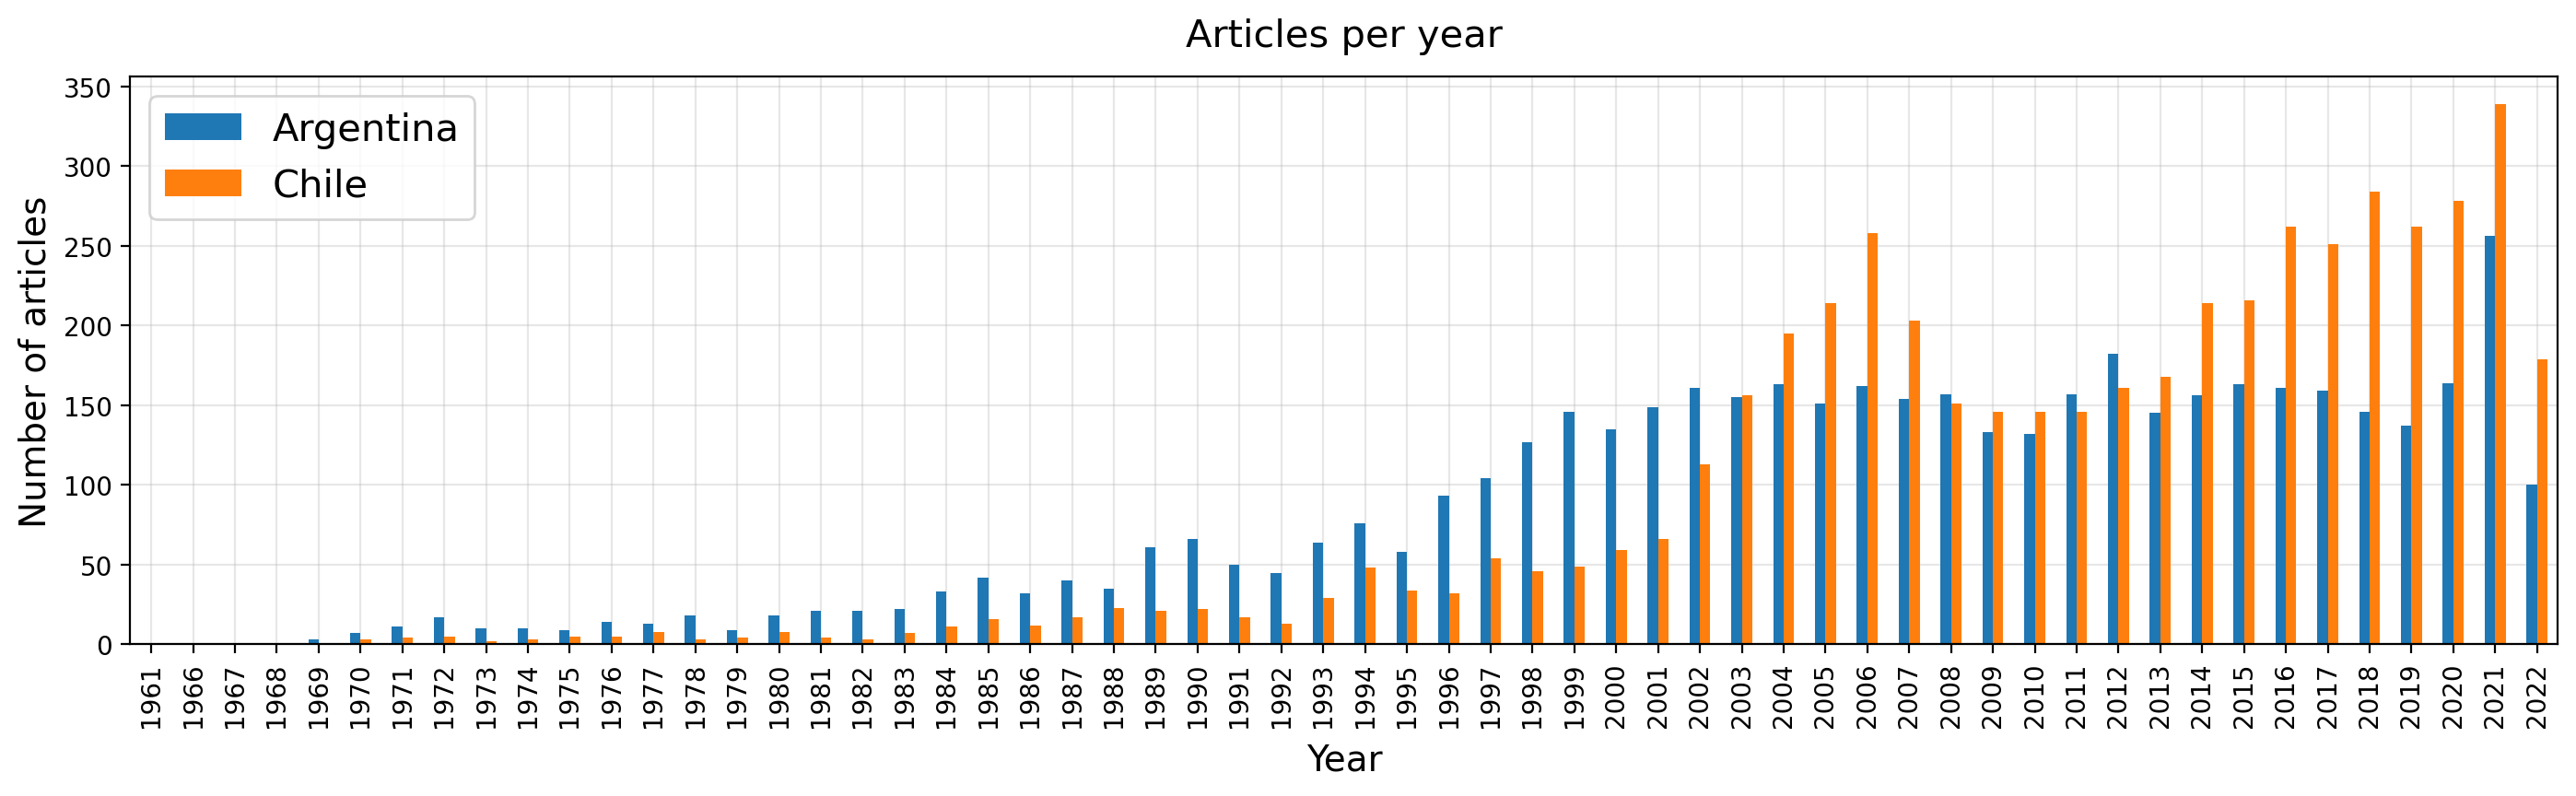

In [8]:
# initialise plot for combination 1

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Argentina', 'Chile'], kind='bar', ax=ax)



ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_1.pdf', dpi=150, bbox_inches = 'tight')

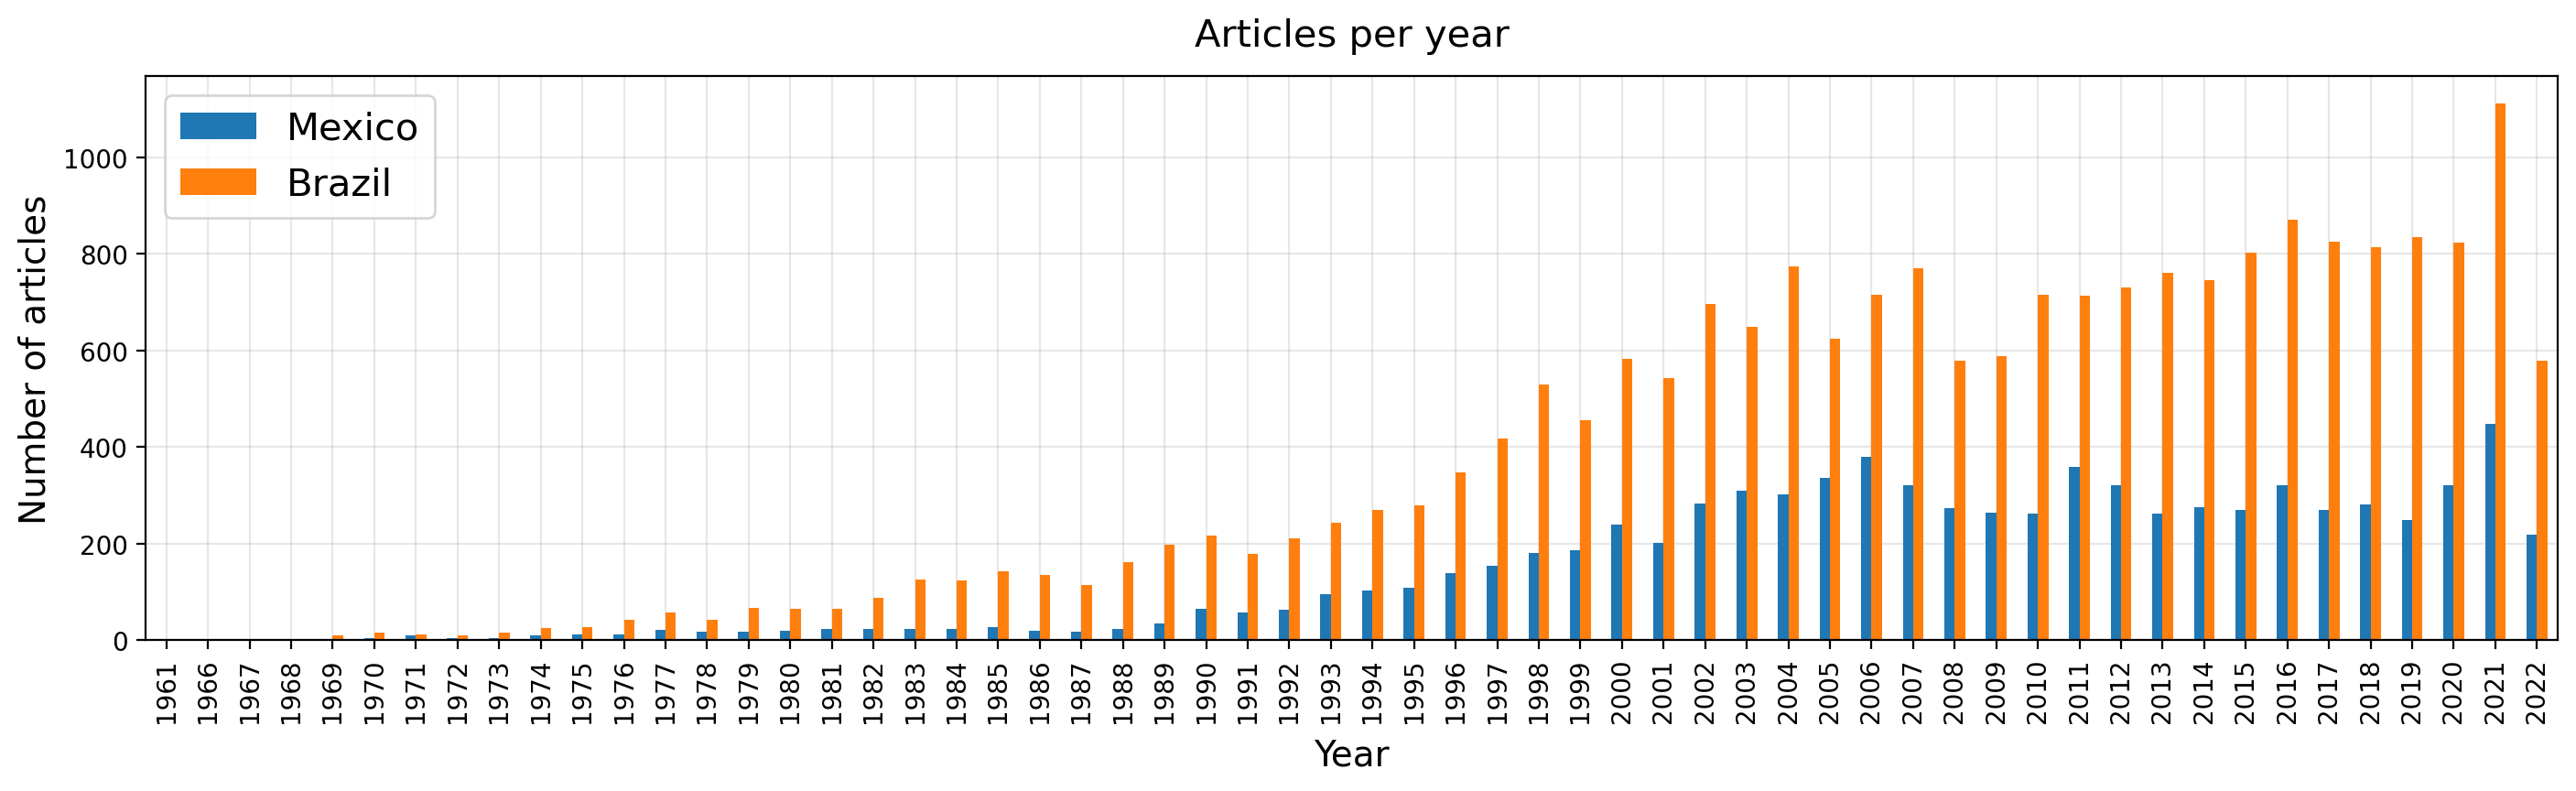

In [9]:
# initialise plot for combination 2

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Mexico', 'Brazil'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_2.pdf', dpi=150, bbox_inches = 'tight')

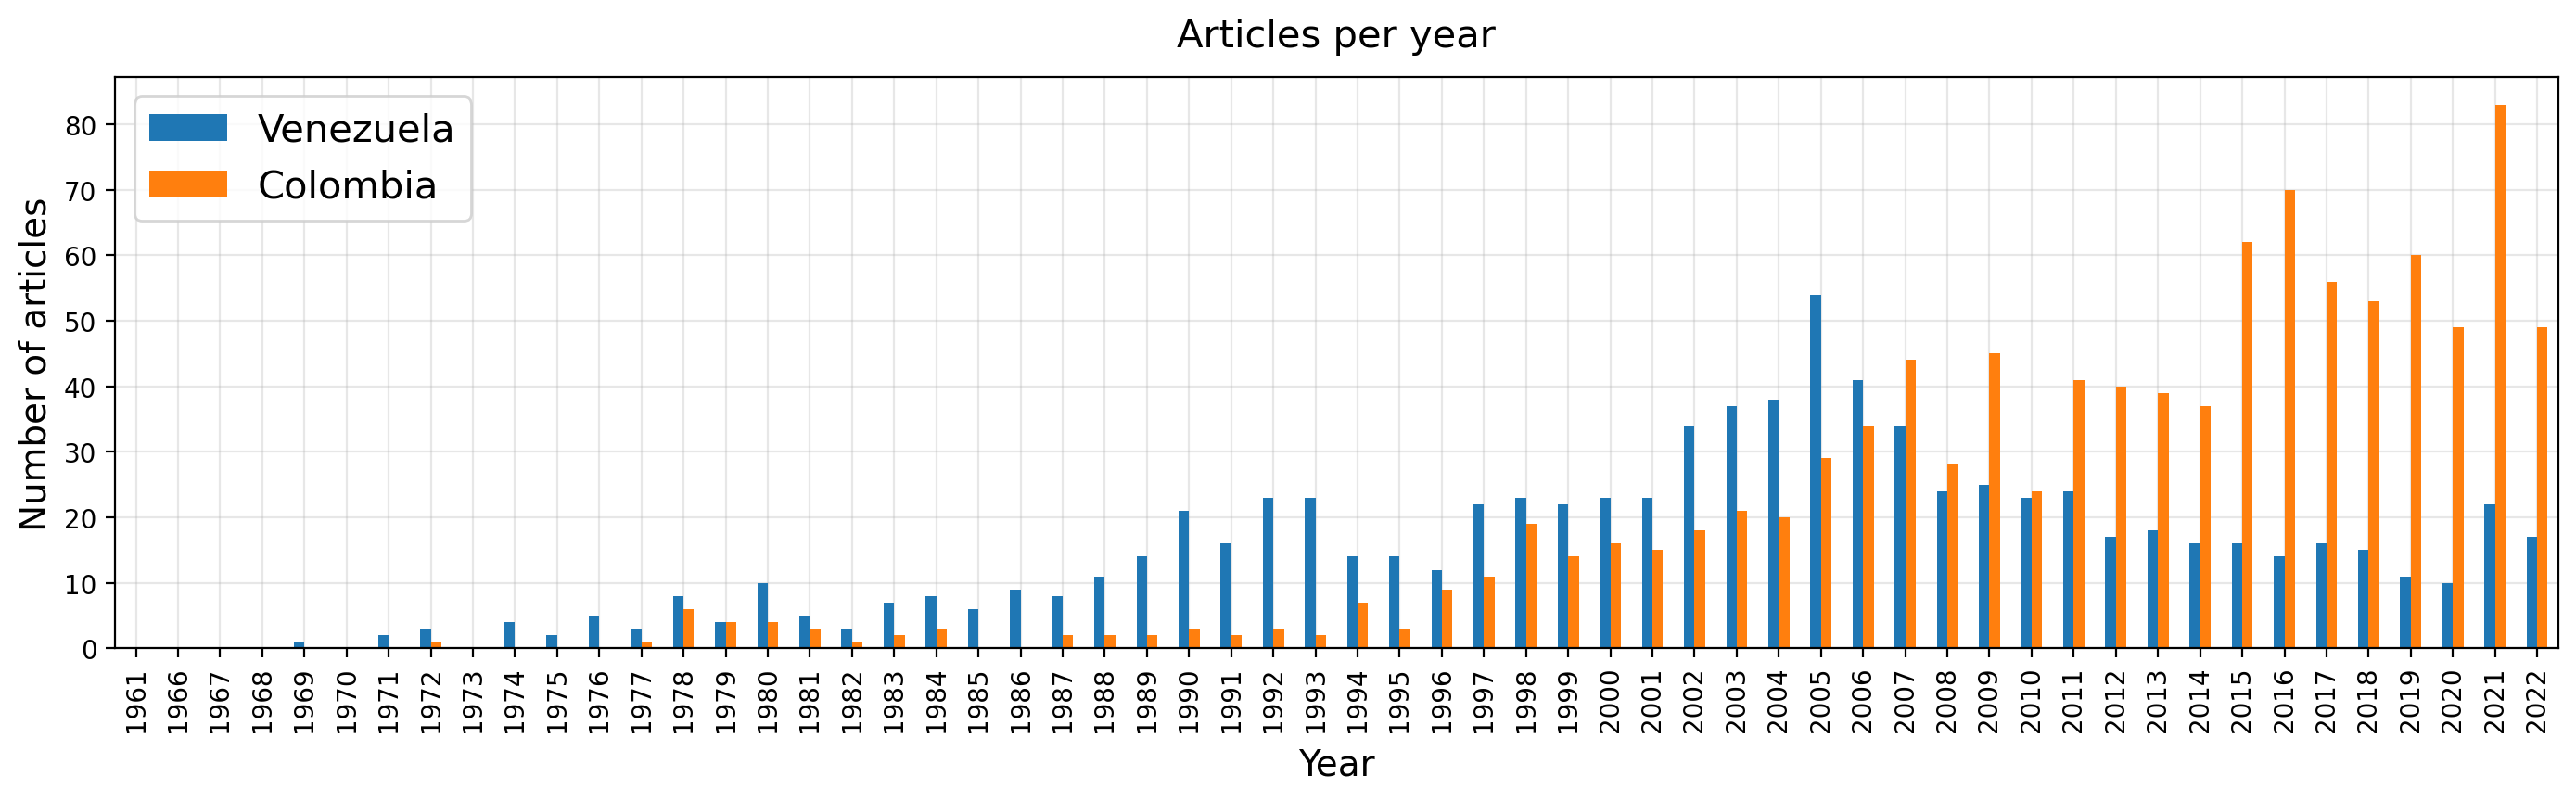

In [10]:
# initialise plot for combination 3

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Venezuela', 'Colombia'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_3.pdf', dpi=150, bbox_inches = 'tight')

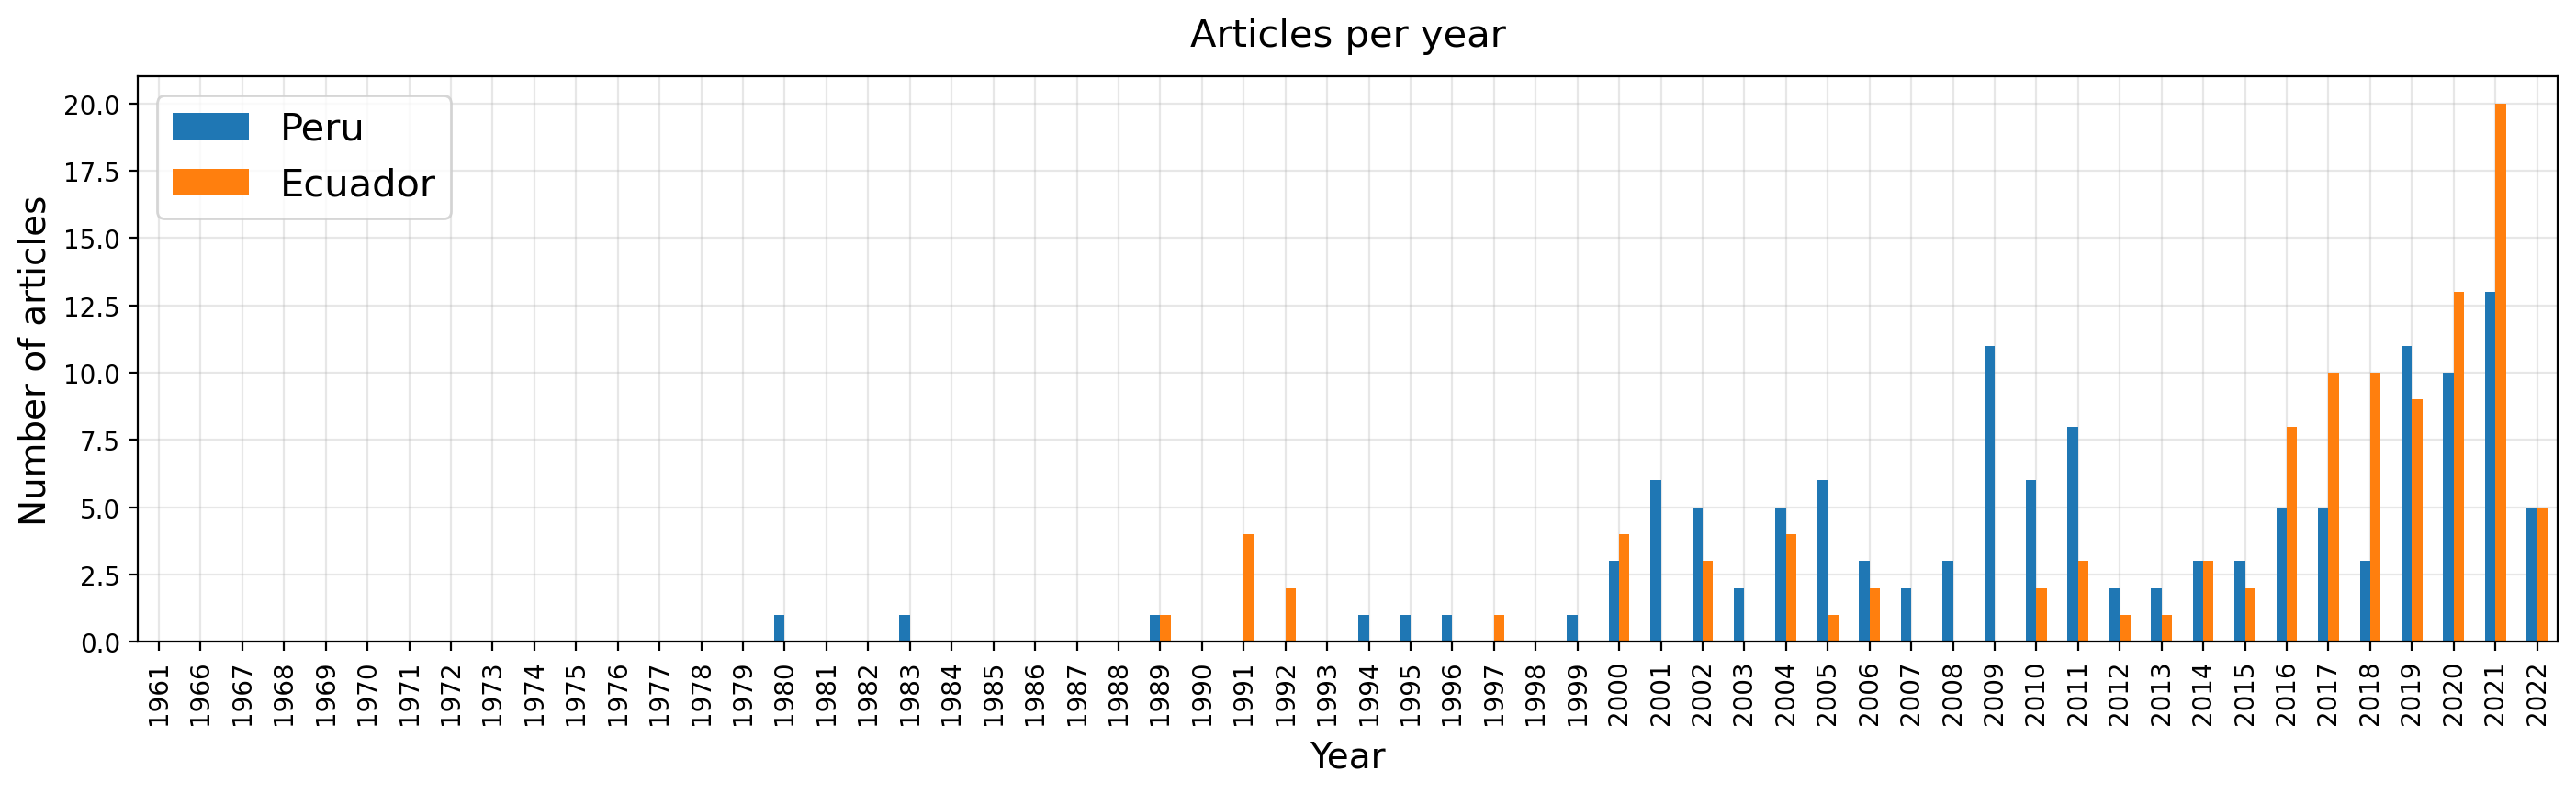

In [11]:
# initialise plot for combination 4

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Peru', 'Ecuador'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_4.pdf', dpi=150, bbox_inches = 'tight')

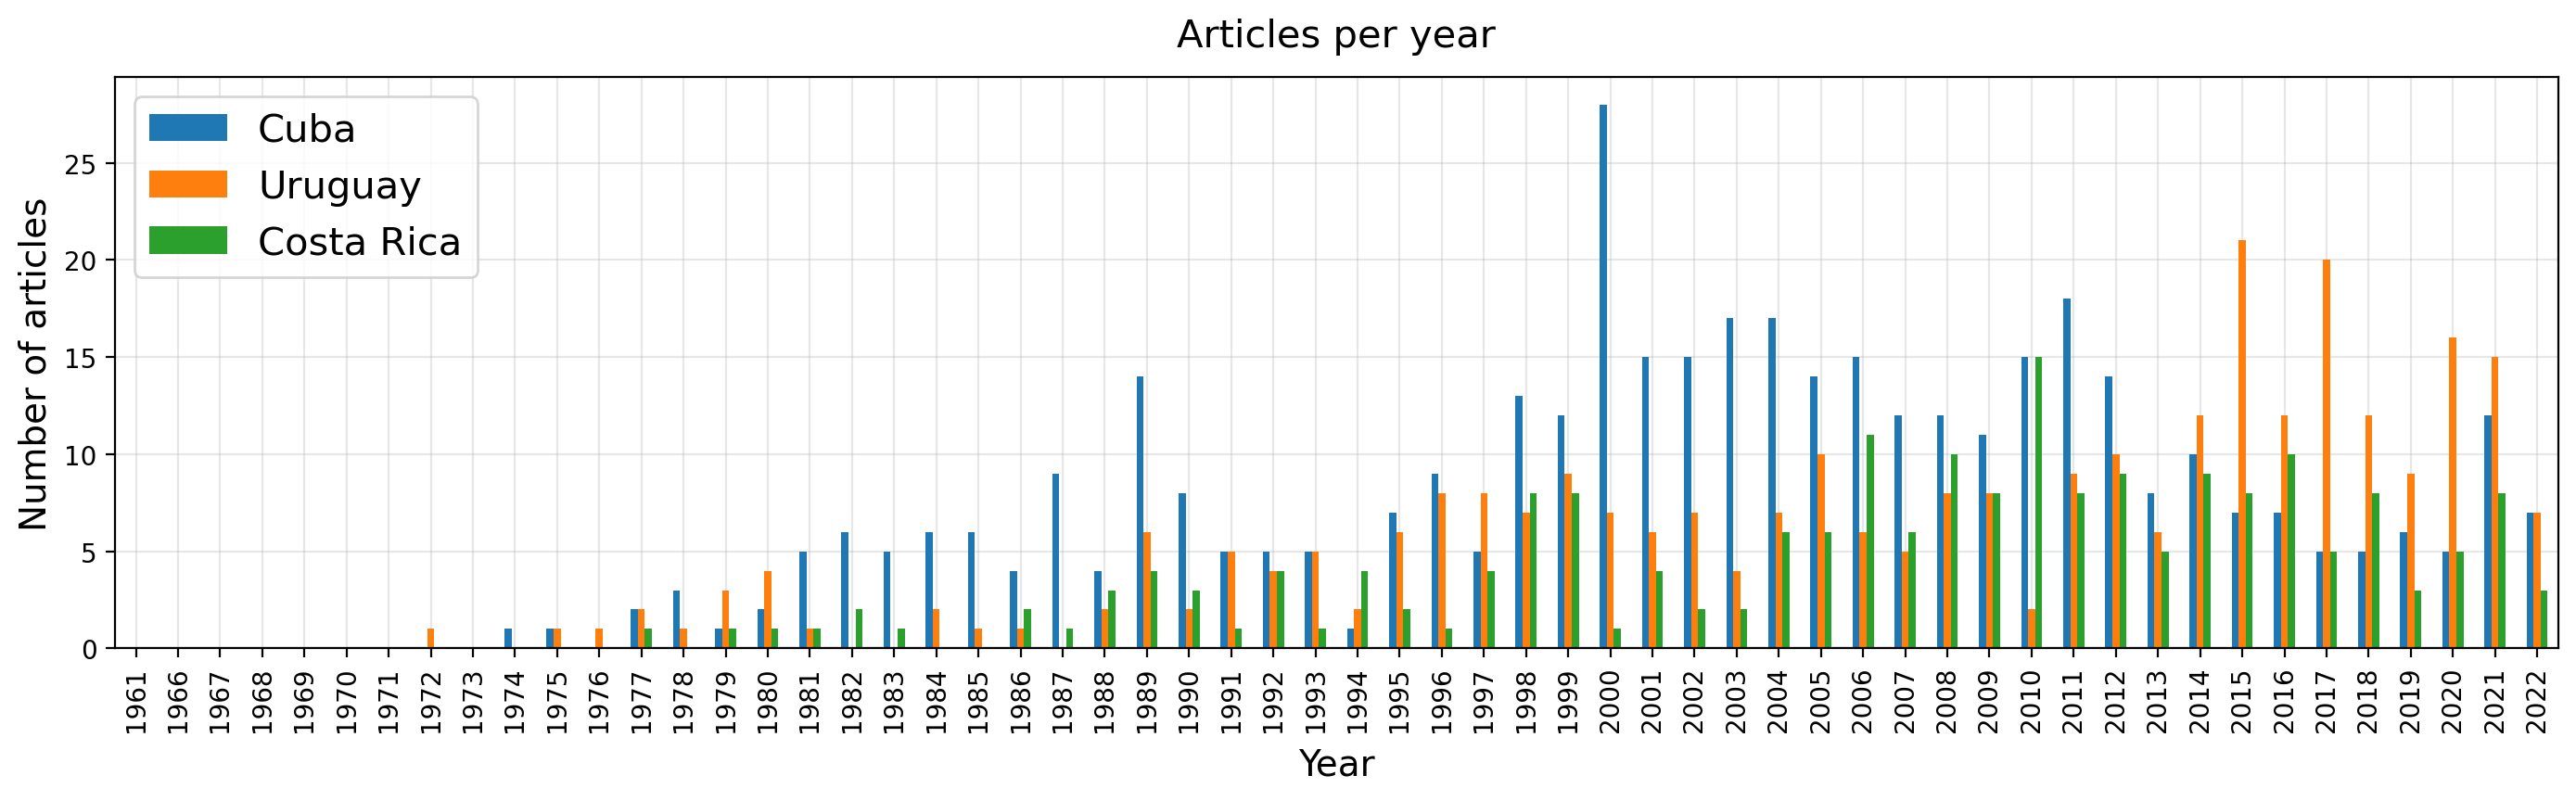

In [12]:
# initialise plot for combination 5

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Cuba', 'Uruguay', 'Costa Rica'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_5.pdf', dpi=150, bbox_inches = 'tight')

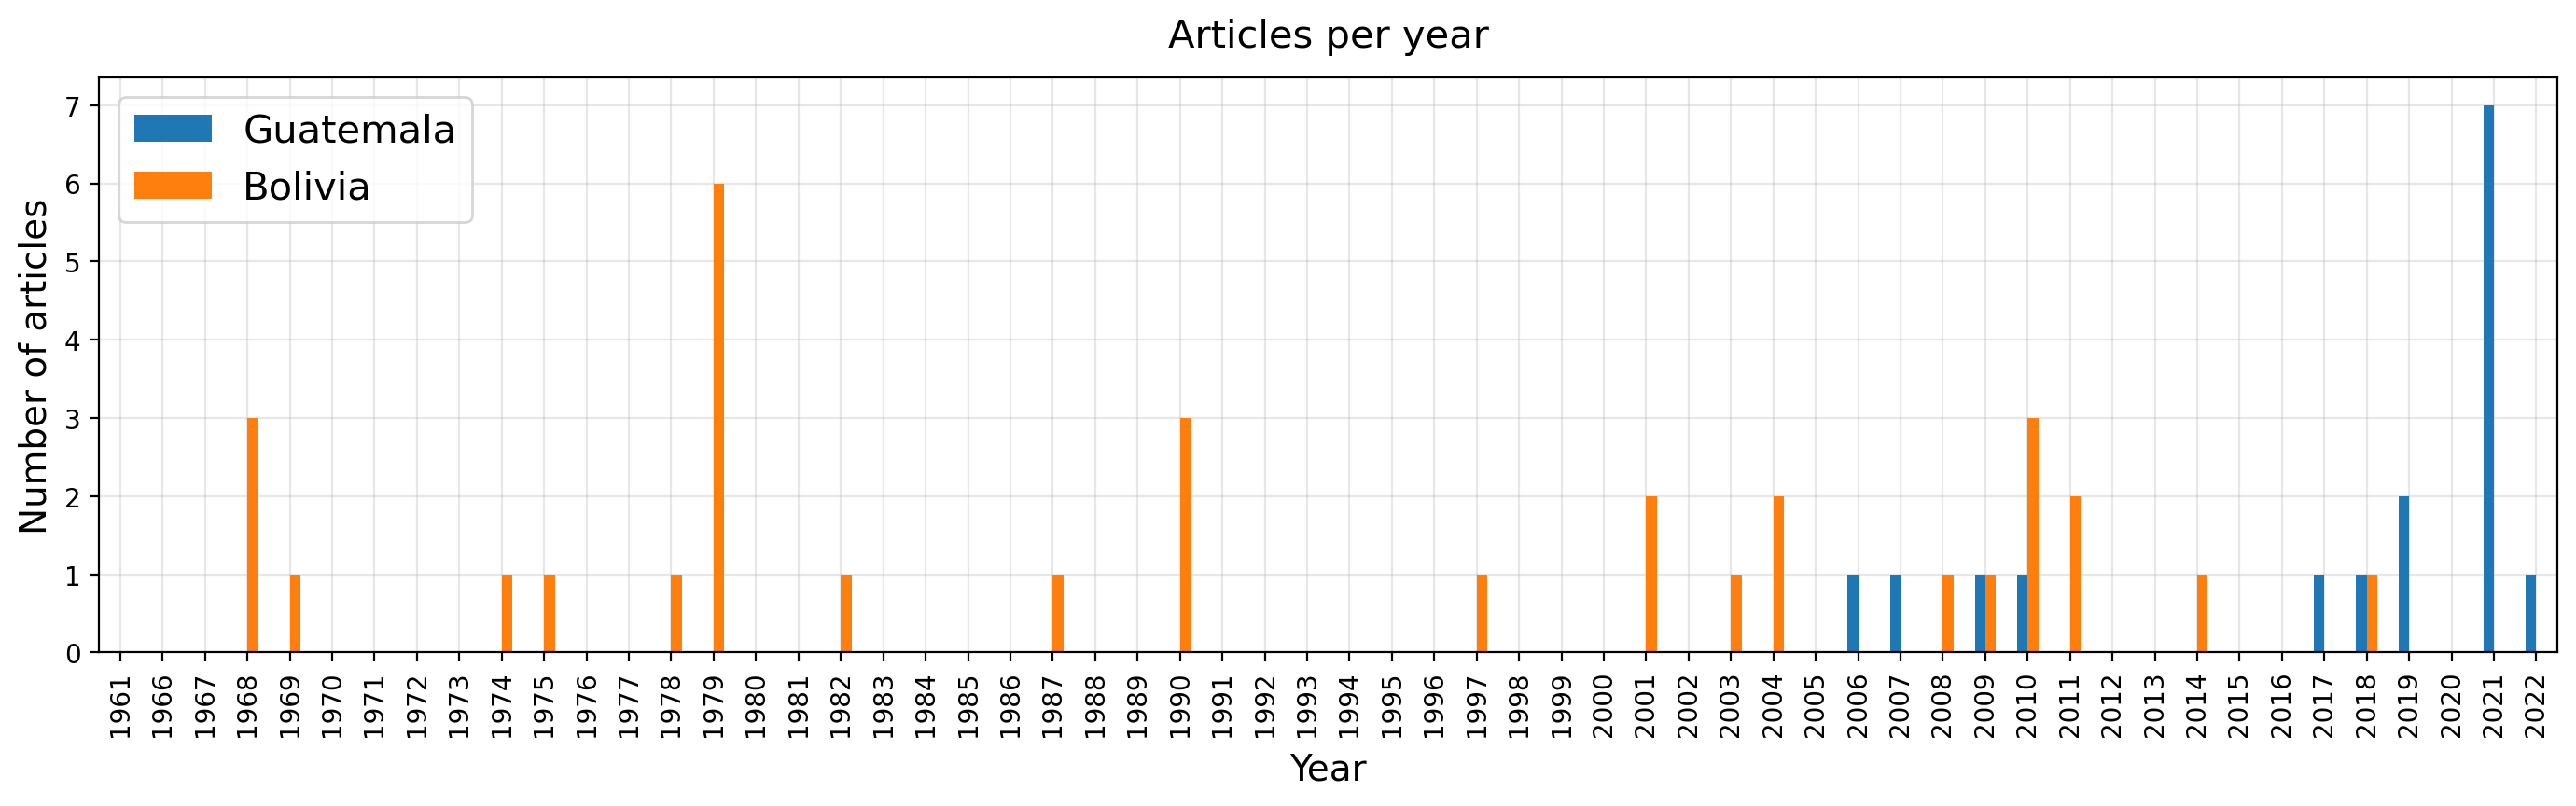

In [13]:
# initialise plot for combination 6

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Guatemala', 'Bolivia'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_6.pdf', dpi=150, bbox_inches = 'tight')

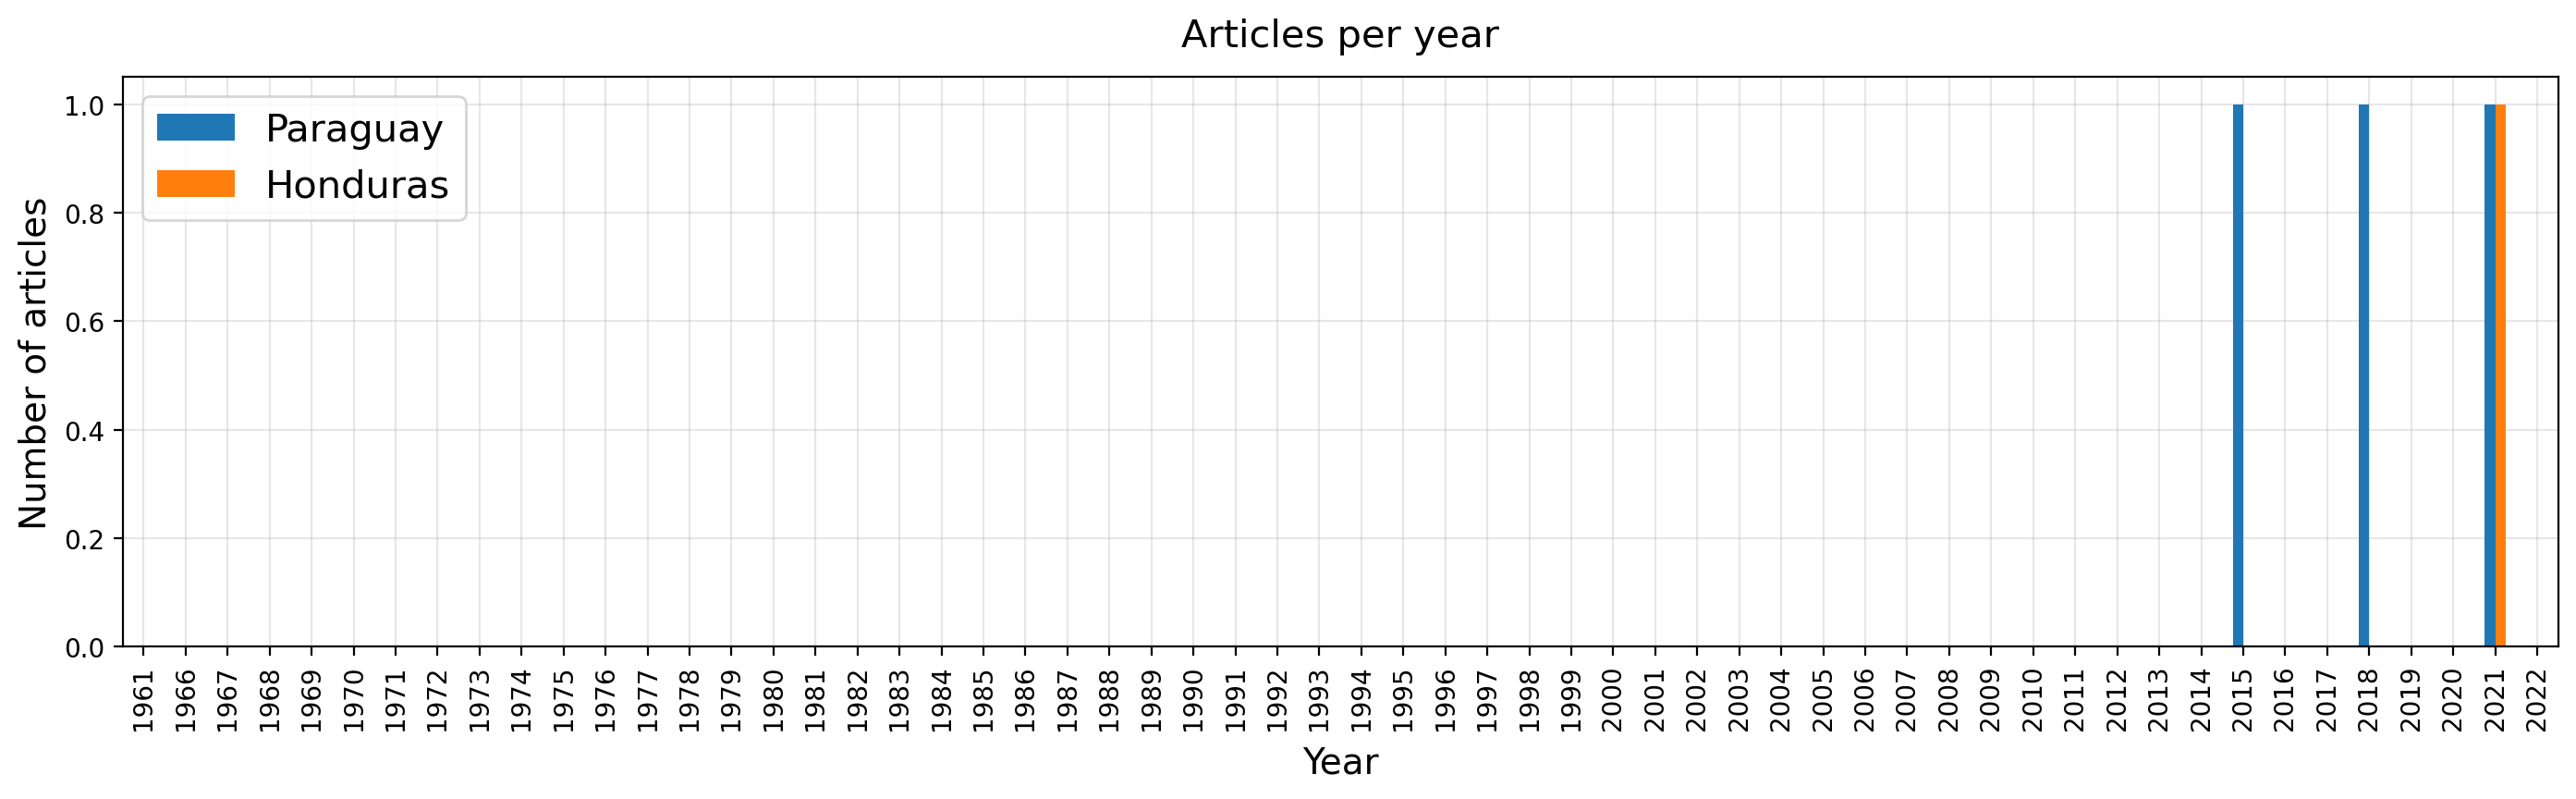

In [14]:
# initialise plot for combination 7

fig, ax = plt.subplots(figsize=(17,4))
df_combined.plot(y=['Paraguay', 'Honduras'], kind='bar', ax=ax)


ax.set_title(f'Articles per year', size=15, pad=12)
ax.set_xlabel('Year', size=14, labelpad=6)
ax.set_ylabel('Number of articles', size=14)
ax.set_axisbelow(True)
ax.grid(True, alpha=0.3)
ax.legend(fontsize=15)
fig.savefig(f'combined_plot_7.pdf', dpi=150, bbox_inches = 'tight')

In [15]:
def plot_articles_per_year(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json',dtype={'institution_id':int})
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    # map the years to numerical values
    dp['year'] = pd.to_numeric(dp['year'])
    fig, ax = plt.subplots(figsize=(10,3))
    dp[(dp['year']!='None') & (dp['year'] >= 1900)]['year'].value_counts().sort_index().plot(kind='bar')
    ax.set_title(f'Articles from {name_of_country} with up to 10 authors', size=15)
    ax.set_xlabel('Year', size=15, labelpad=6)
    ax.set_ylabel('Number of articles', size=15)
    ax.set_axisbelow(True)
    ax.grid(True)
    fig.savefig(f'articles_countries_per_year/articles_{name_of_country}_per_year.pdf', dpi=150, bbox_inches = 'tight')

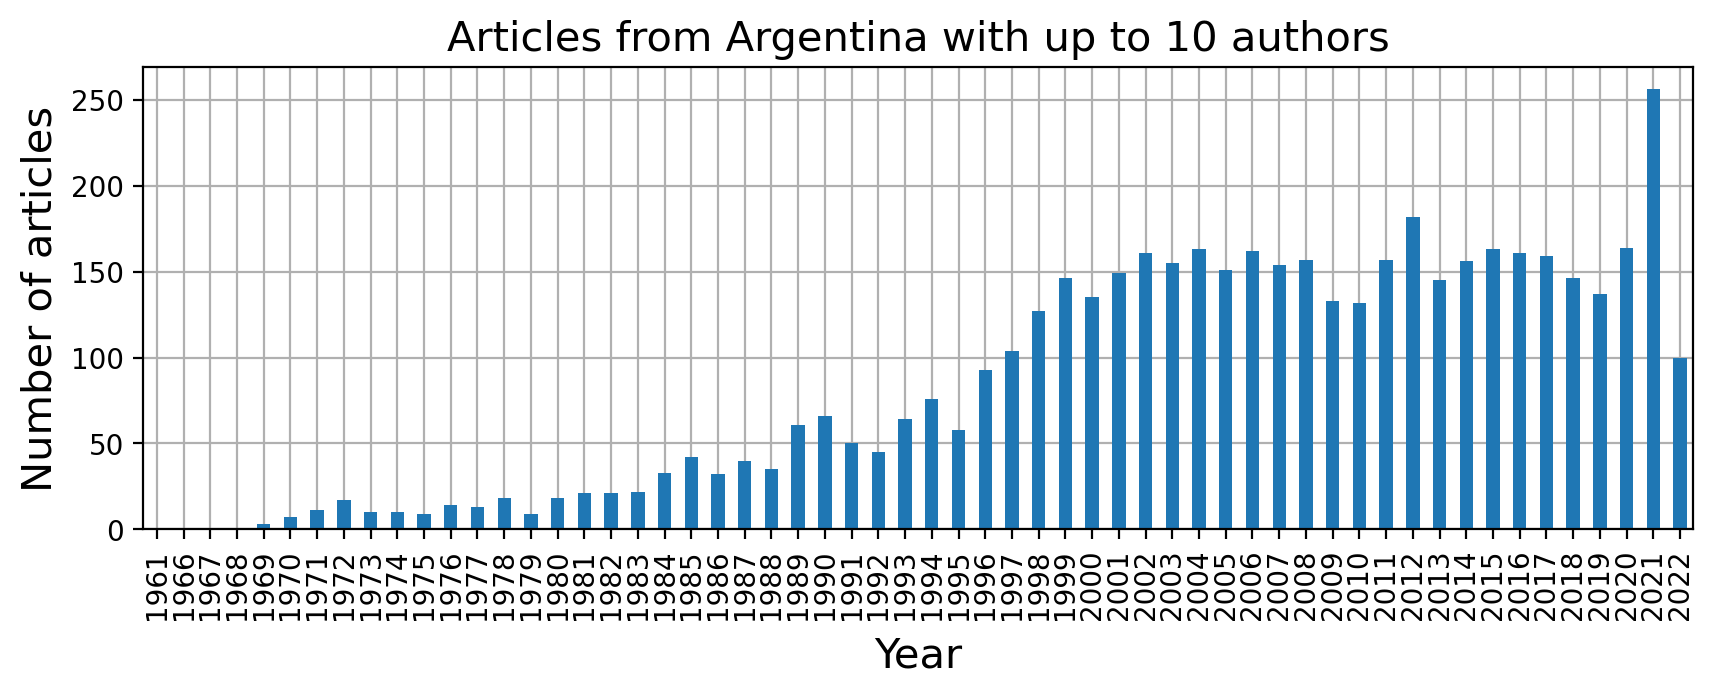

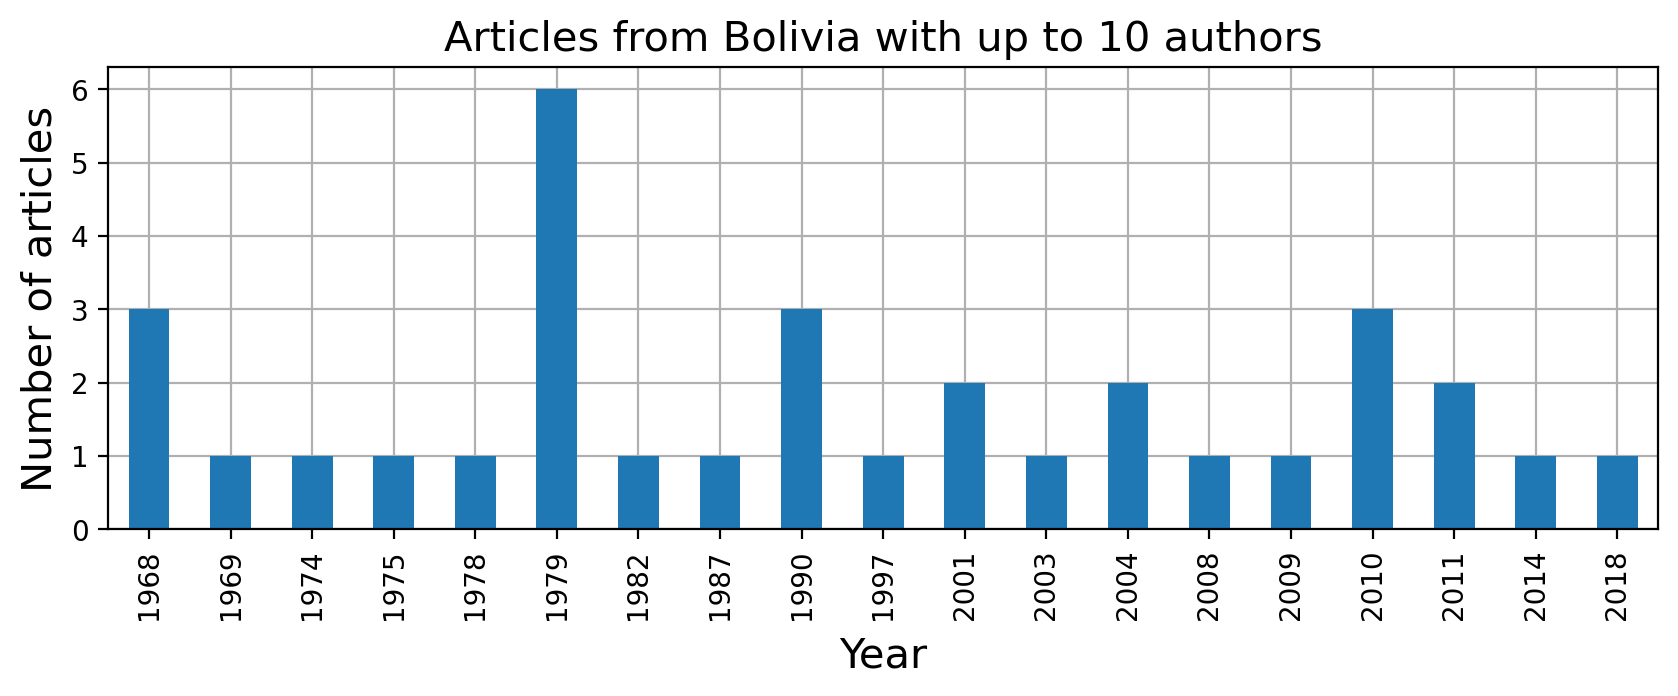

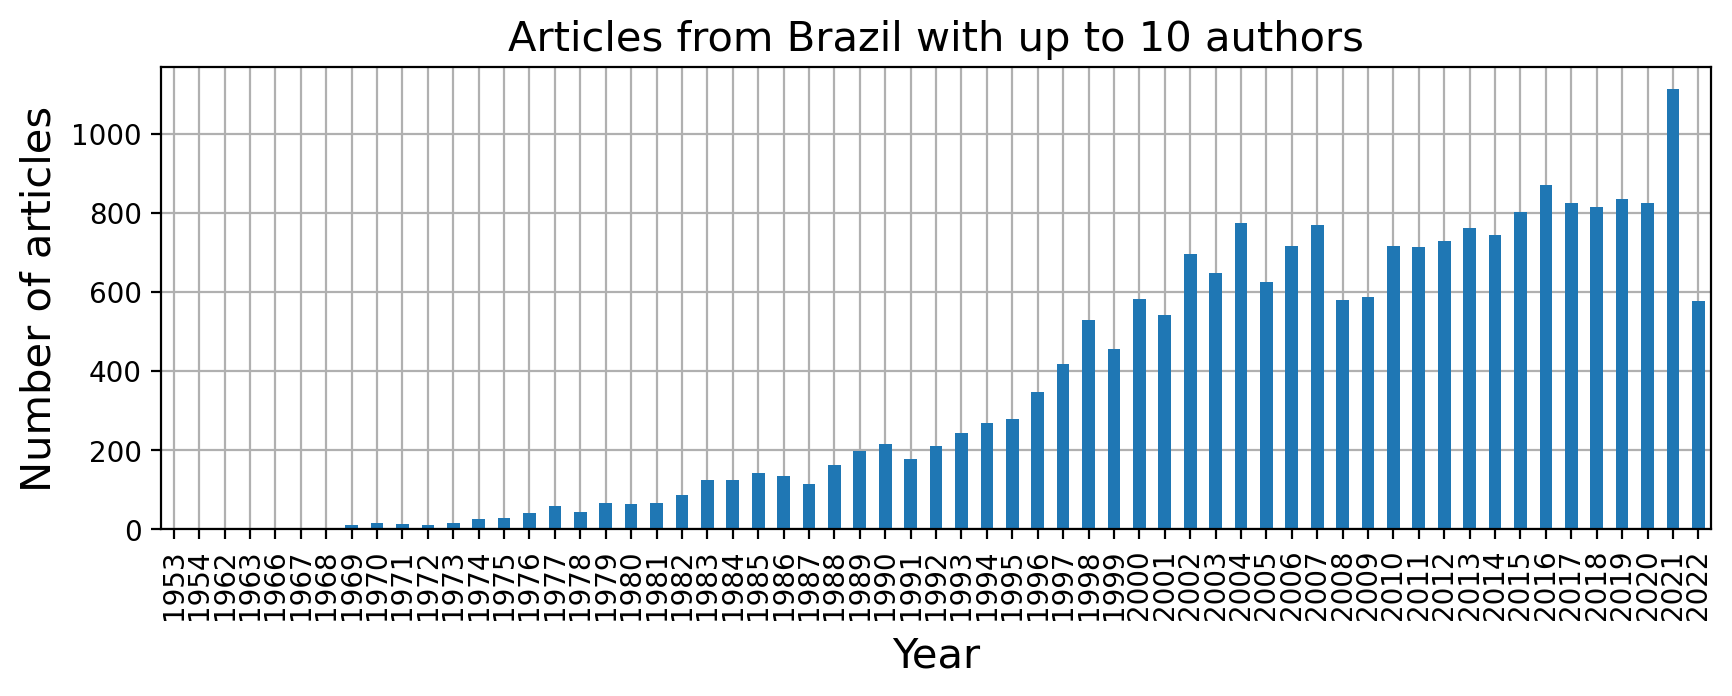

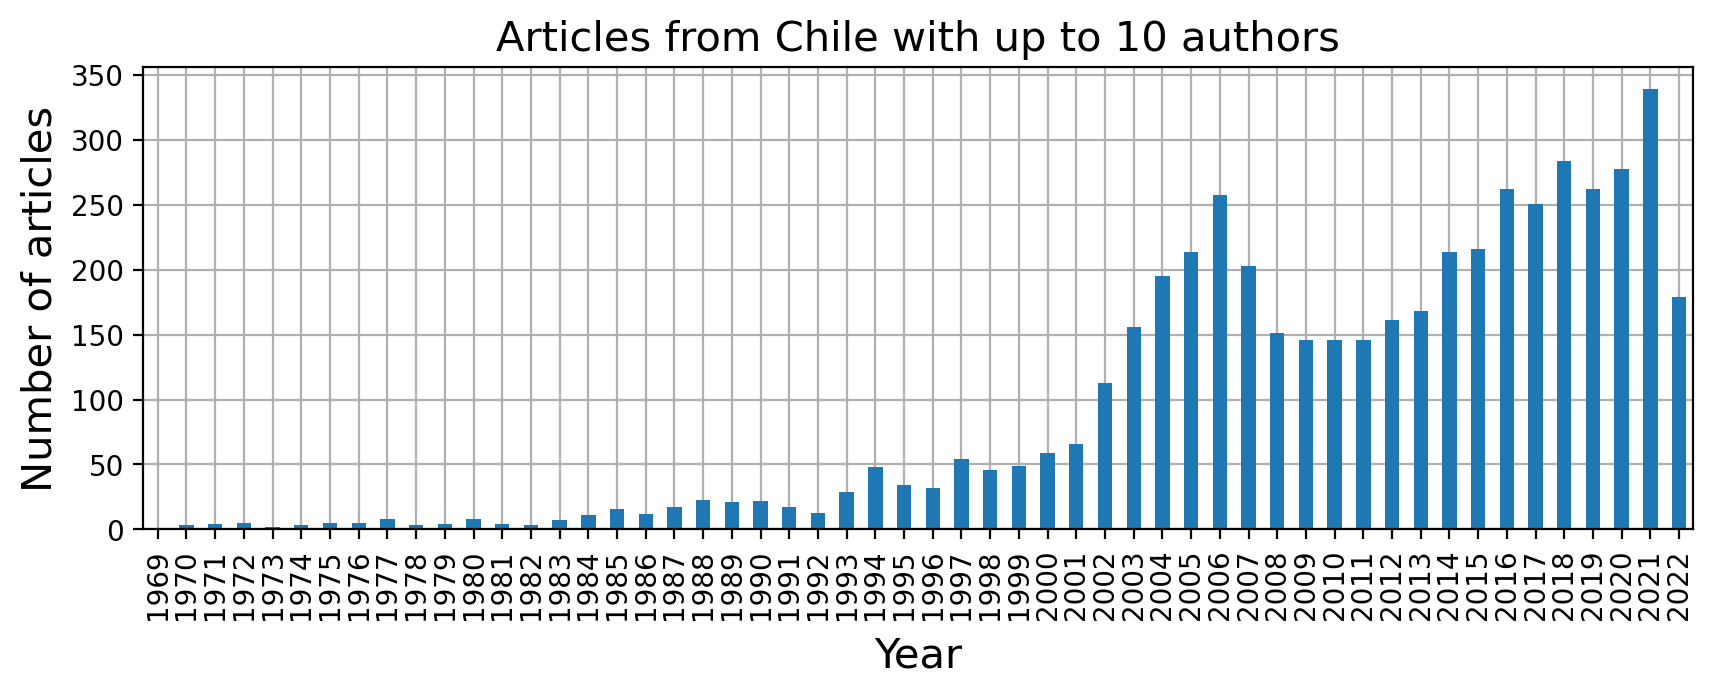

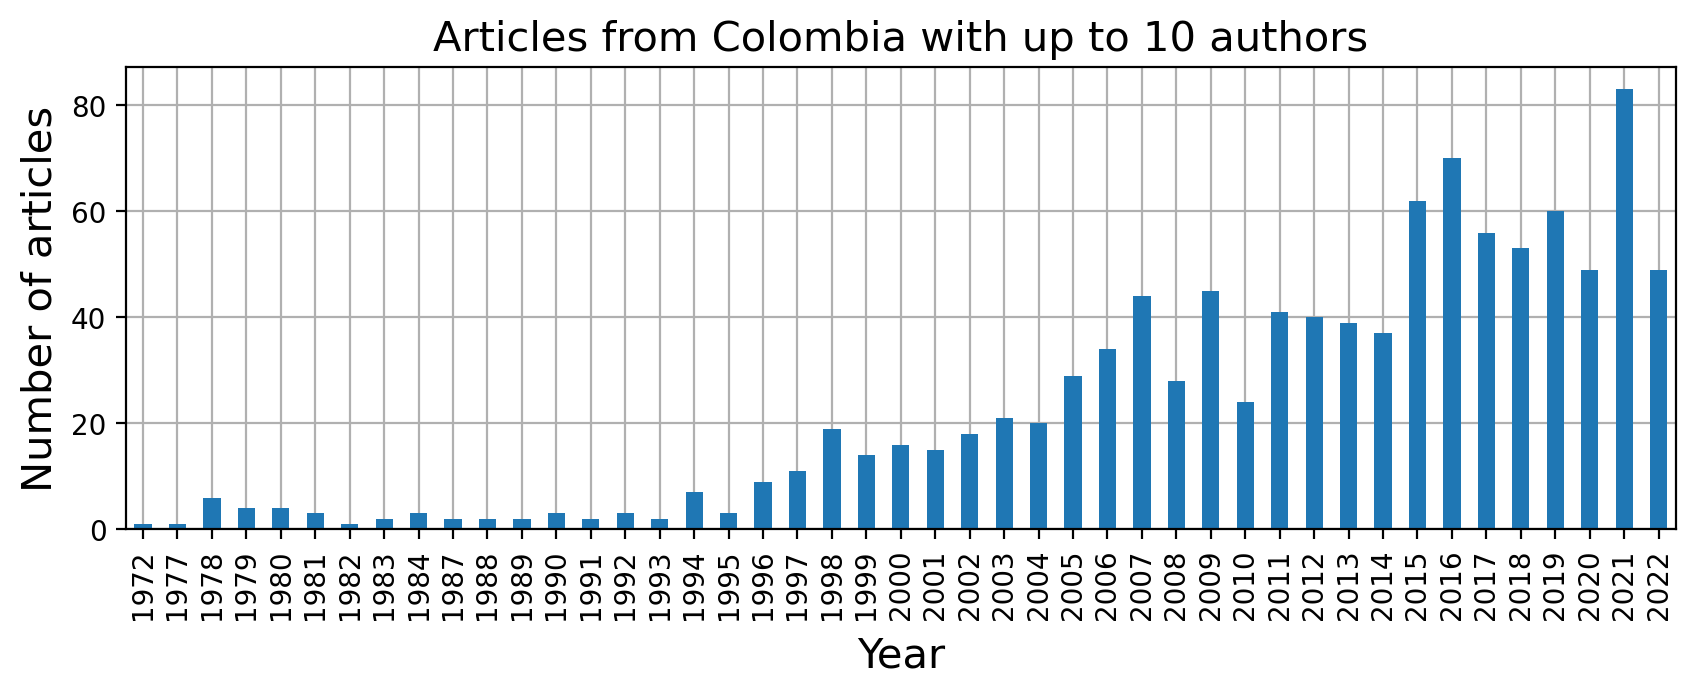

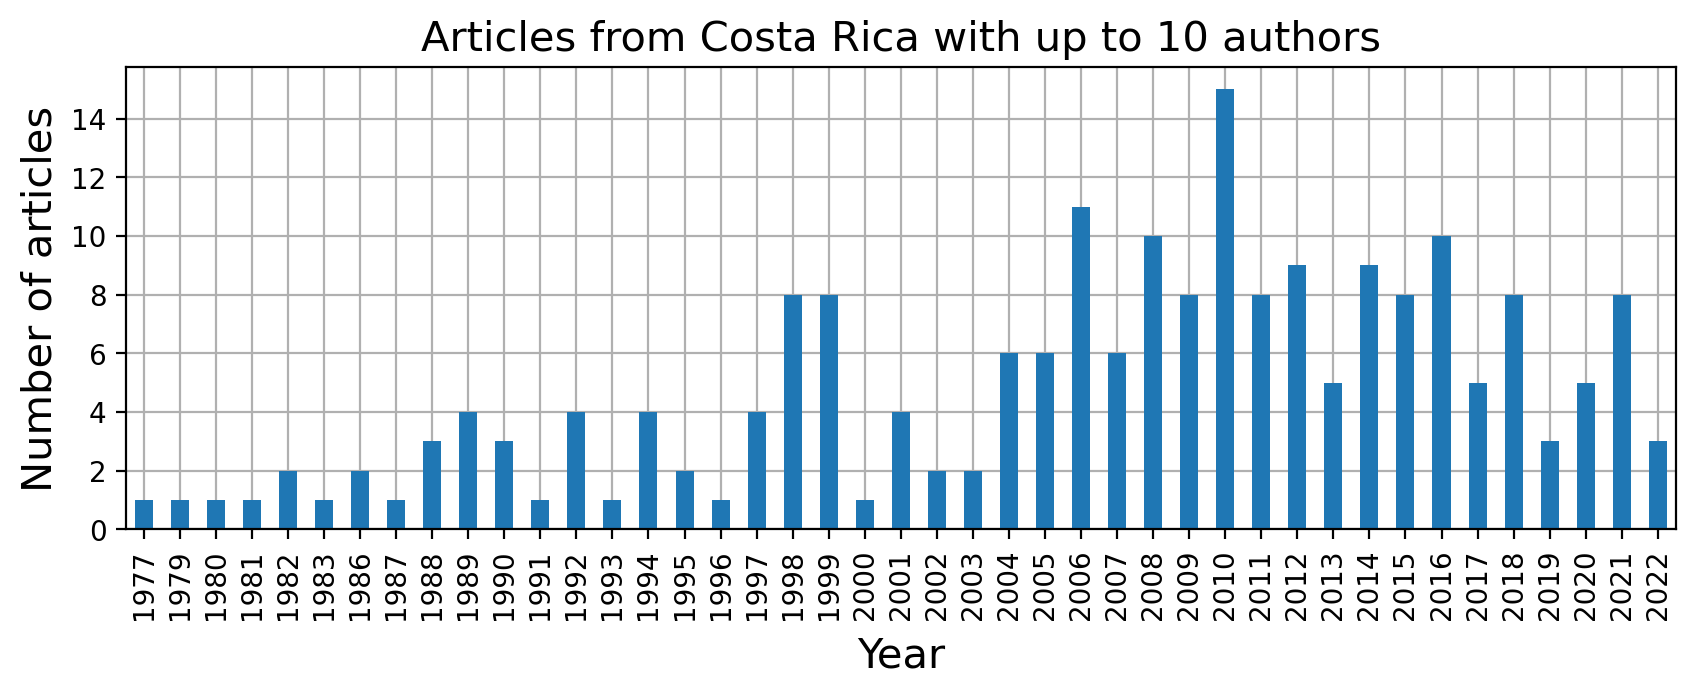

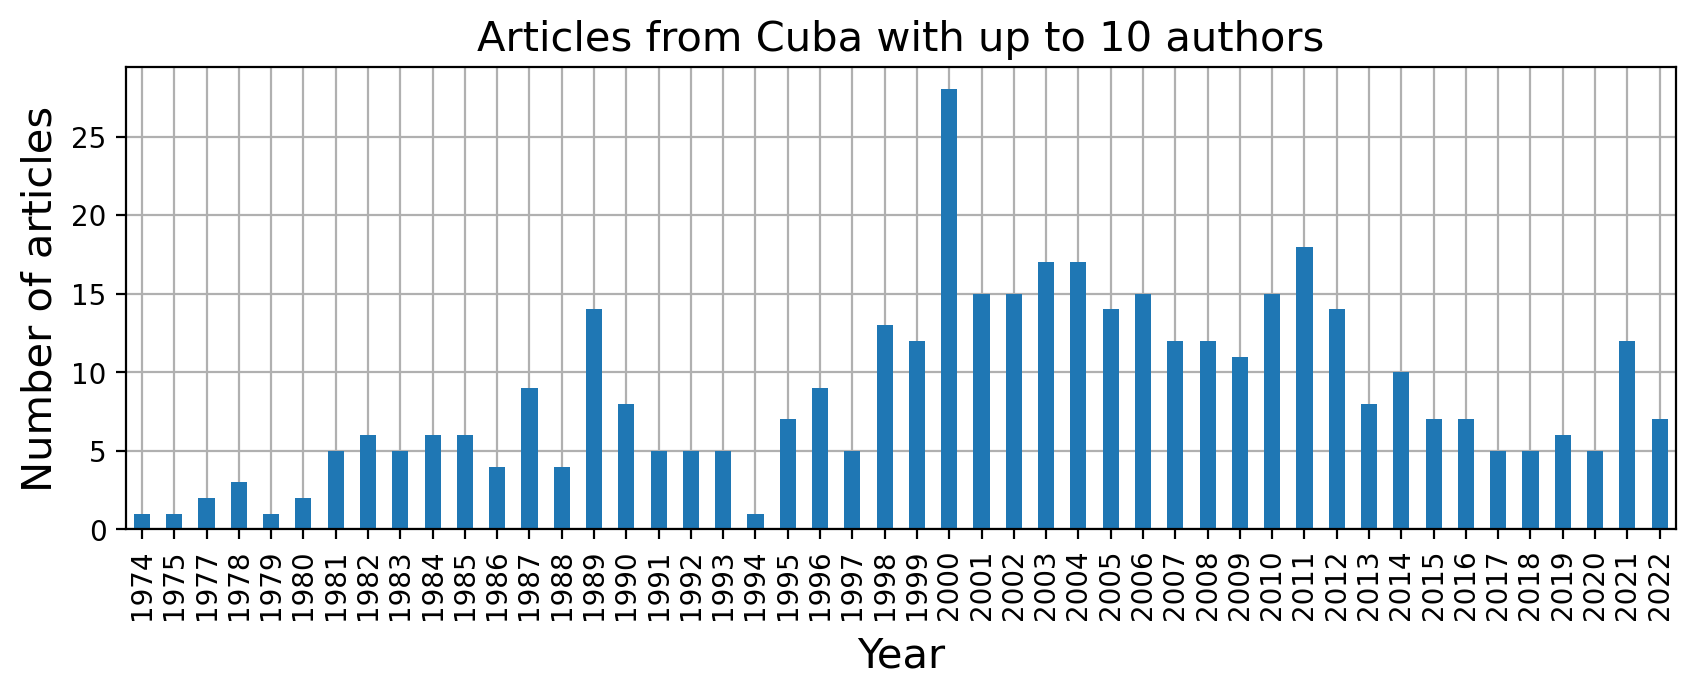

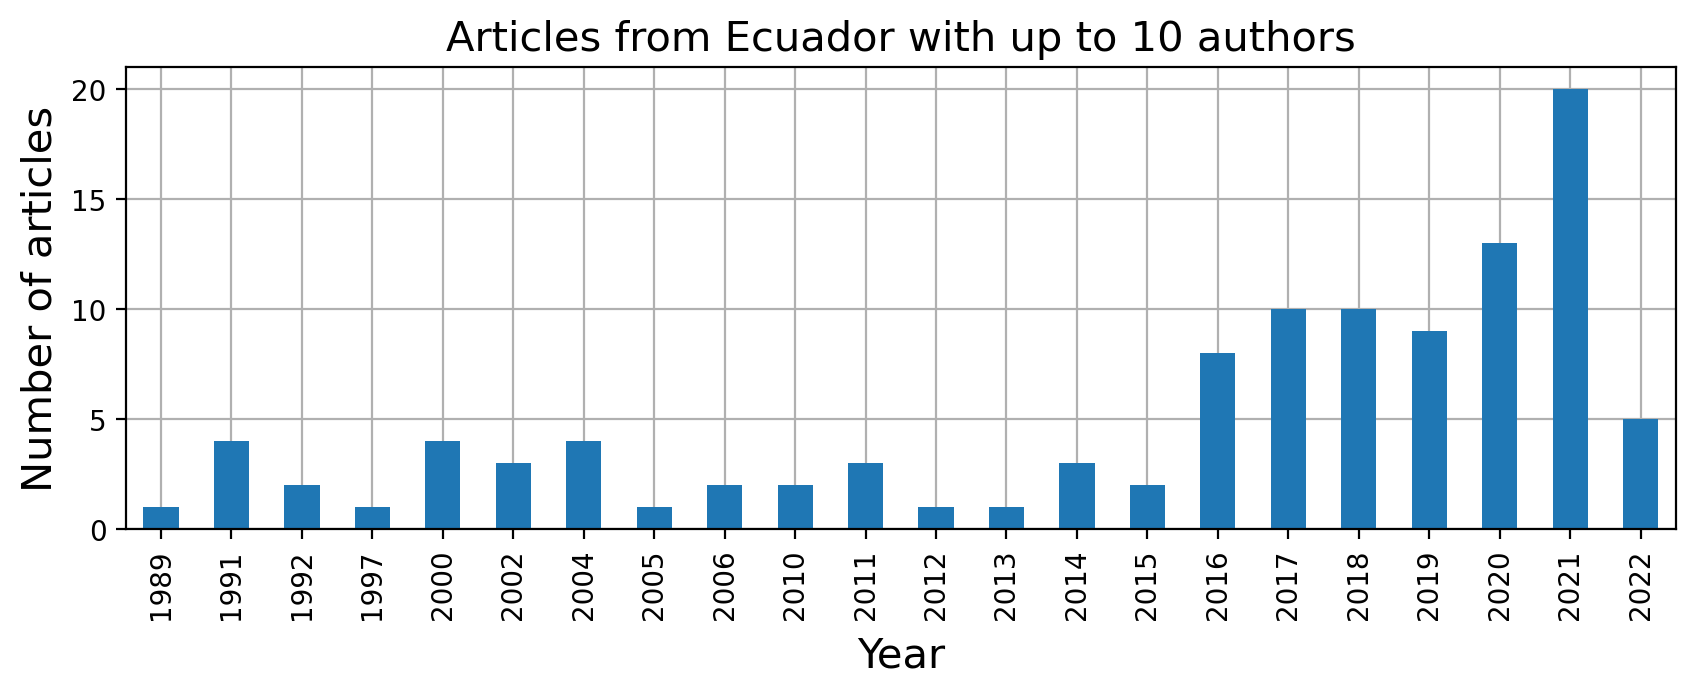

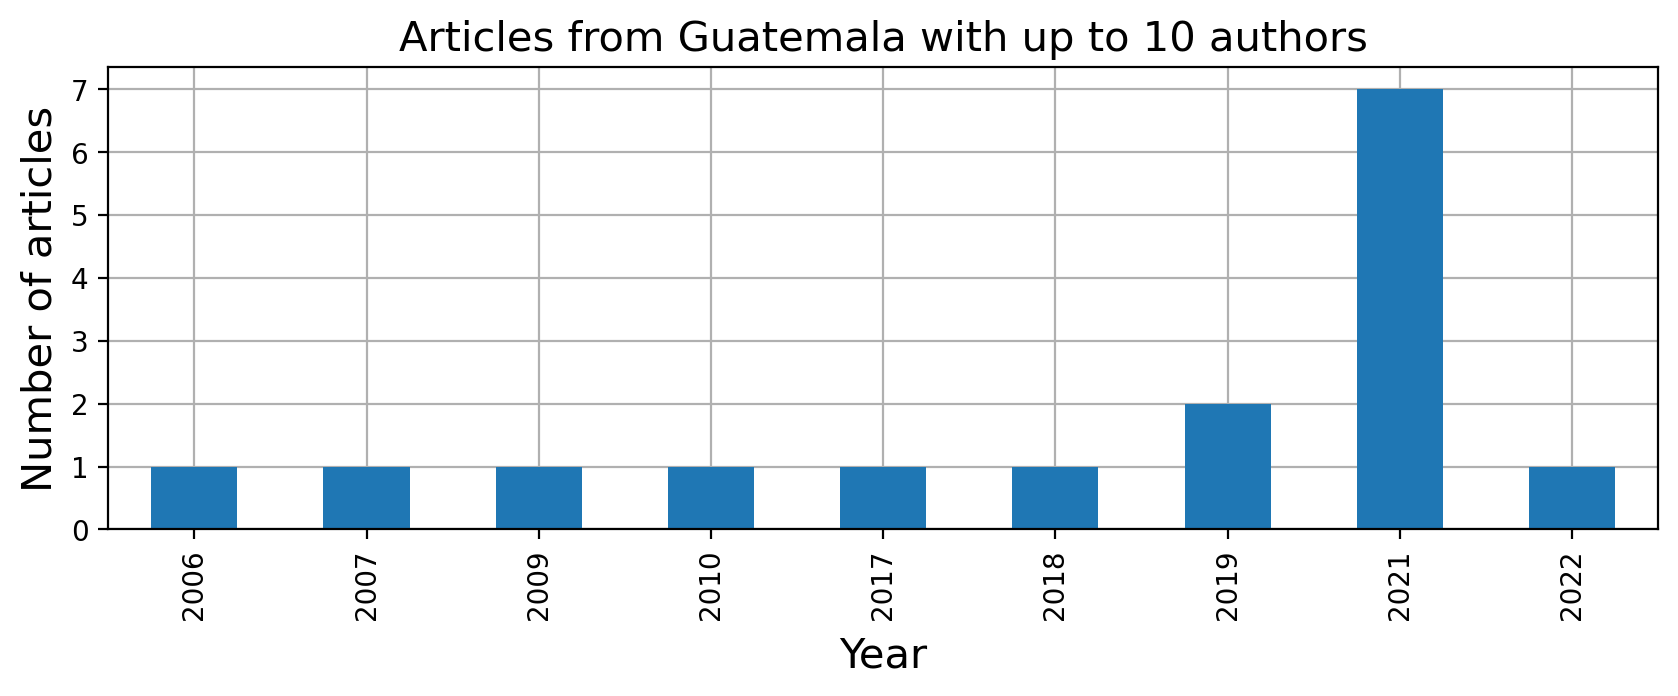

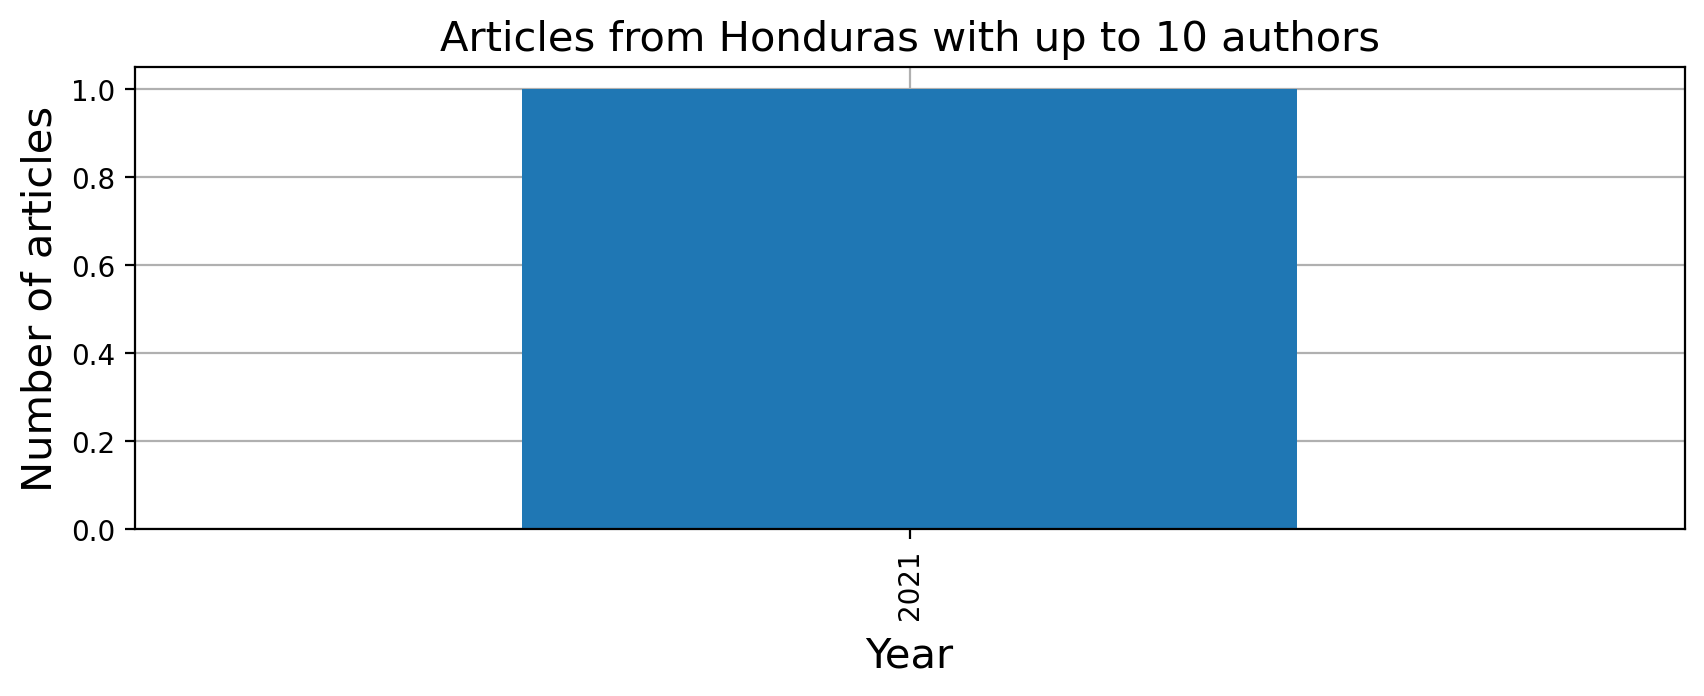

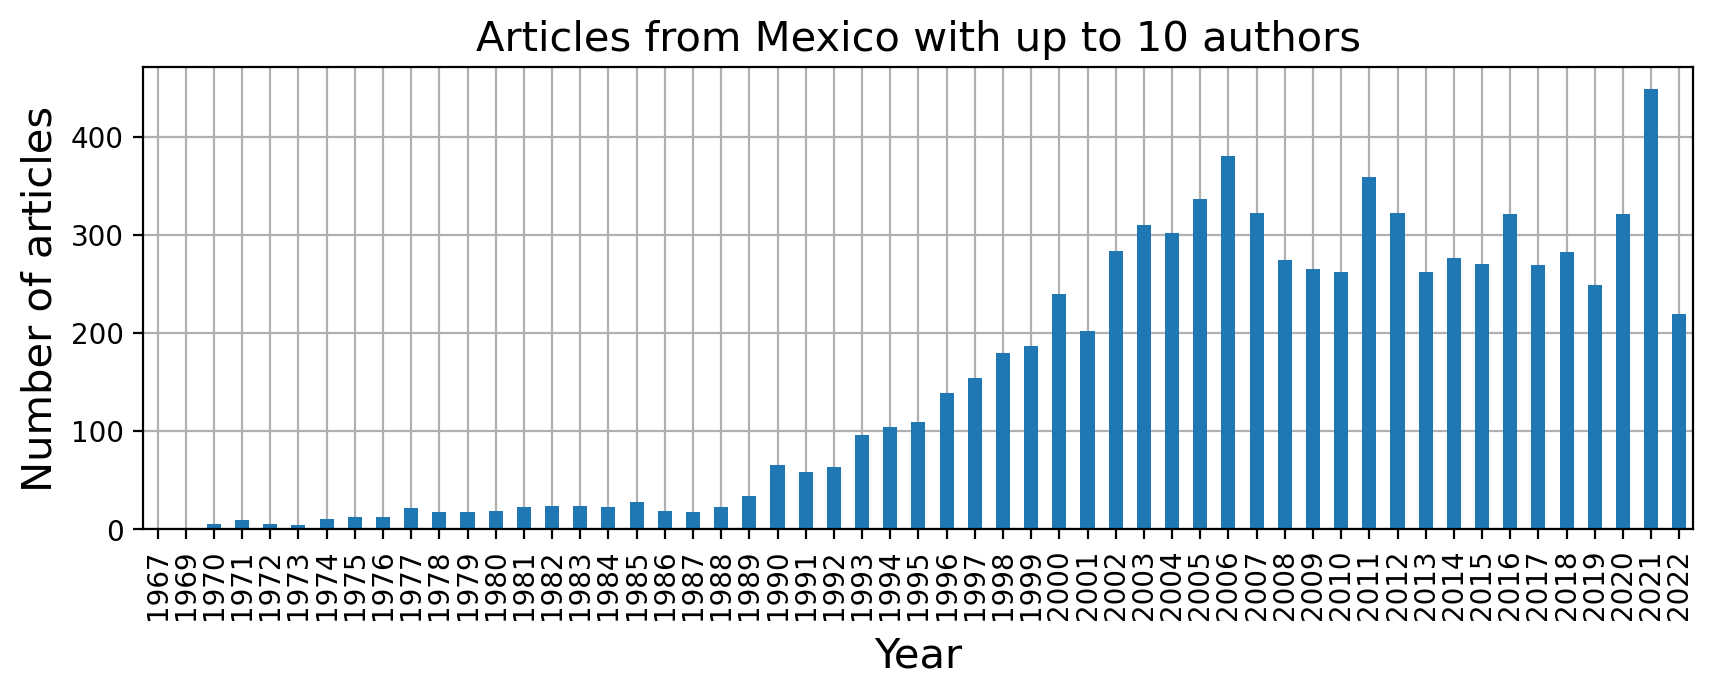

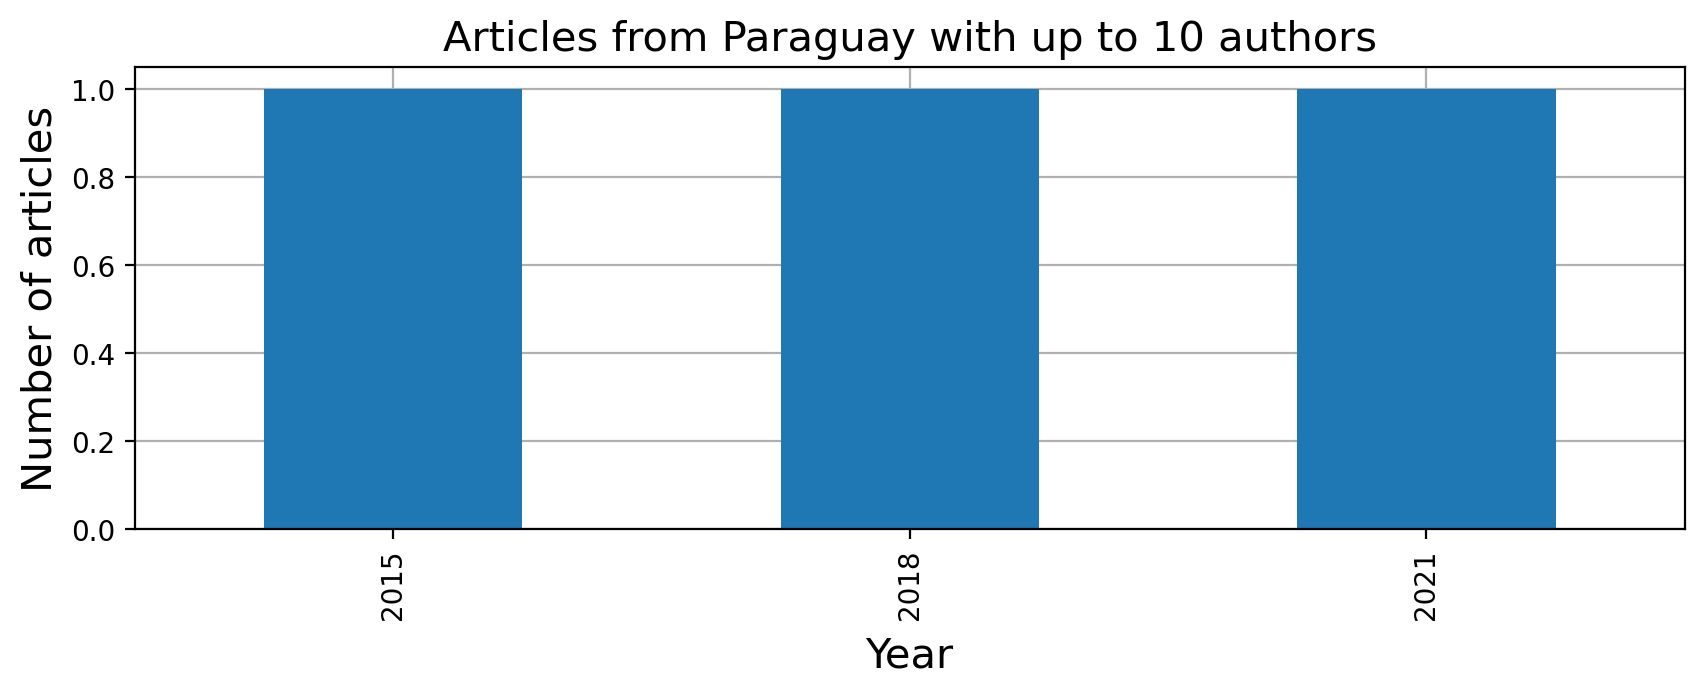

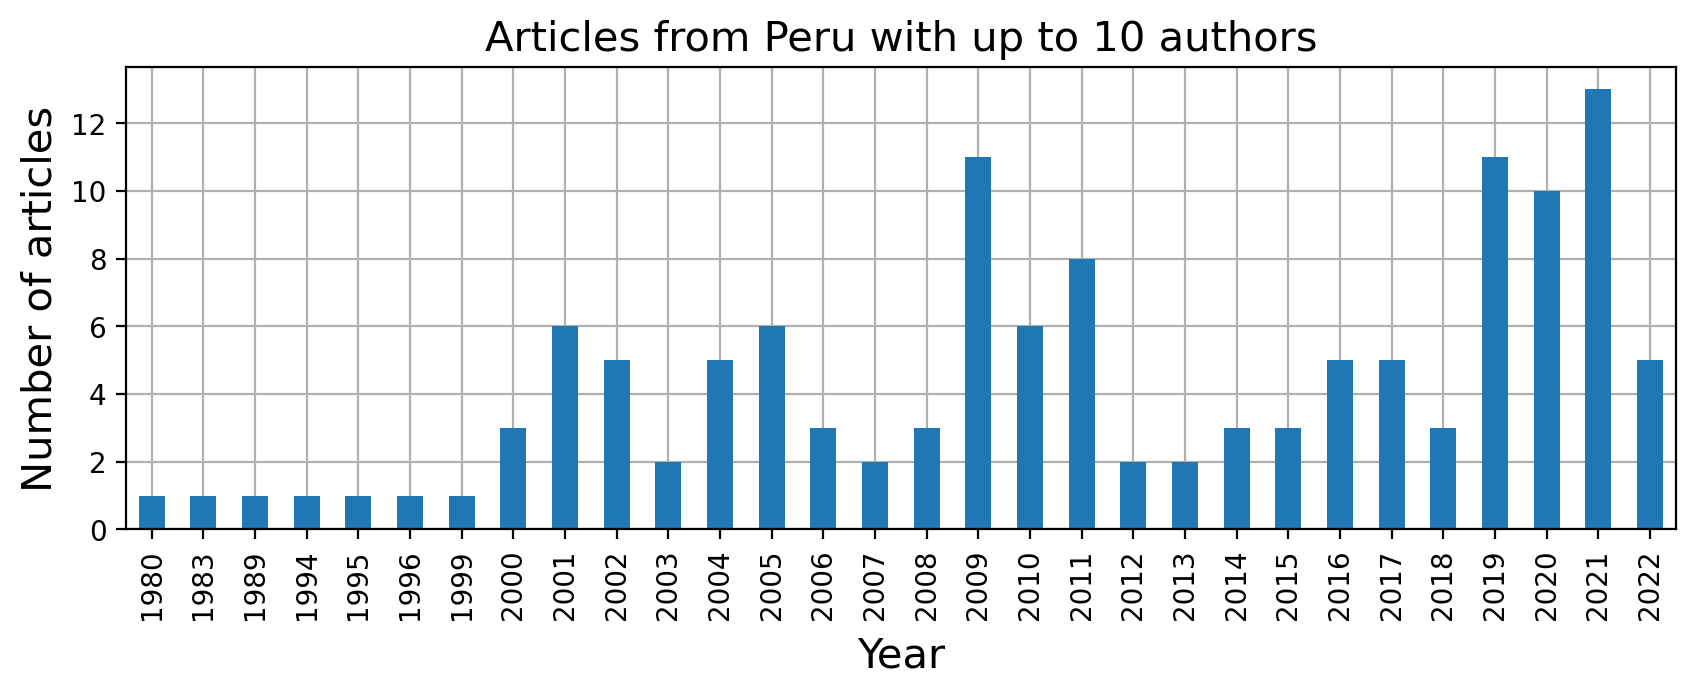

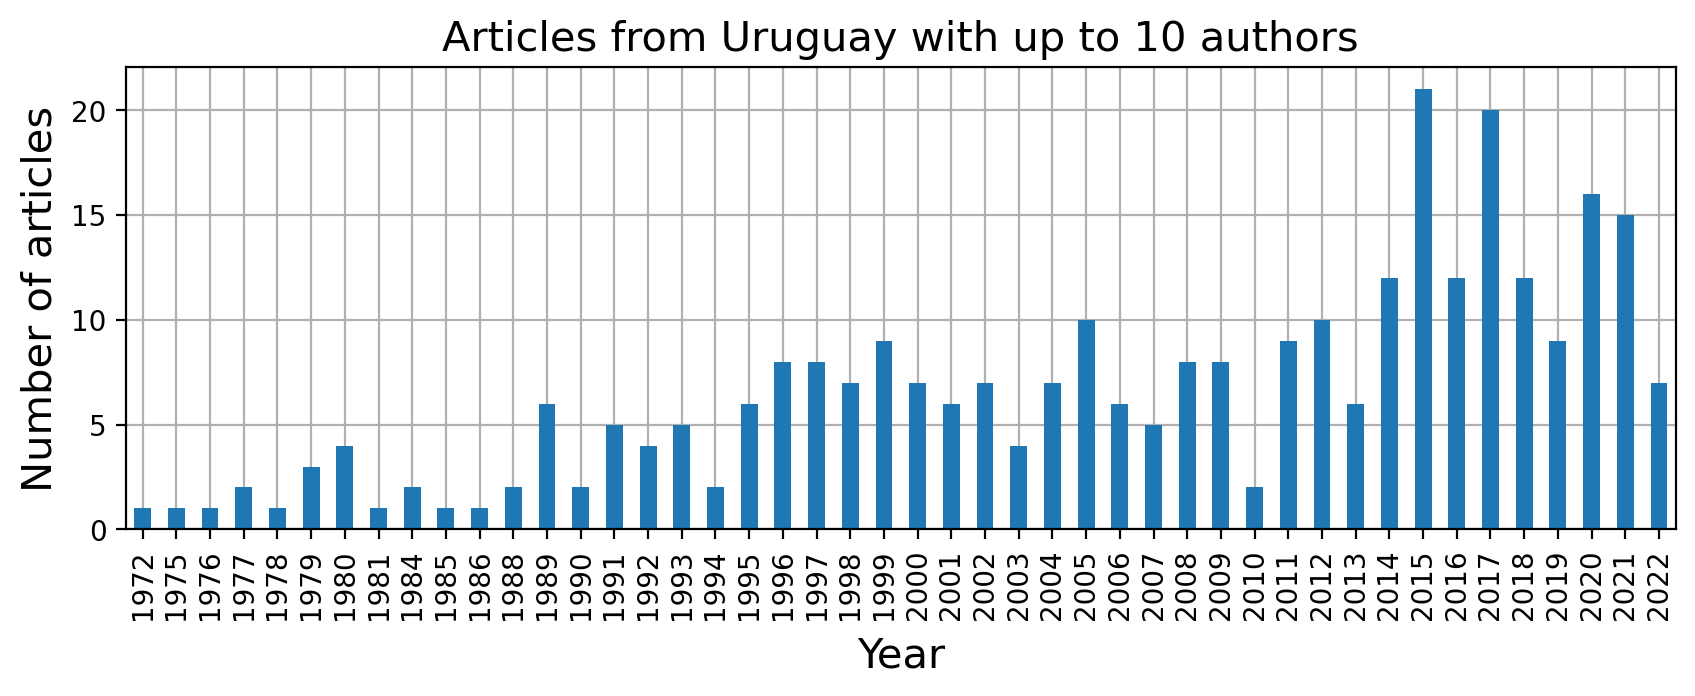

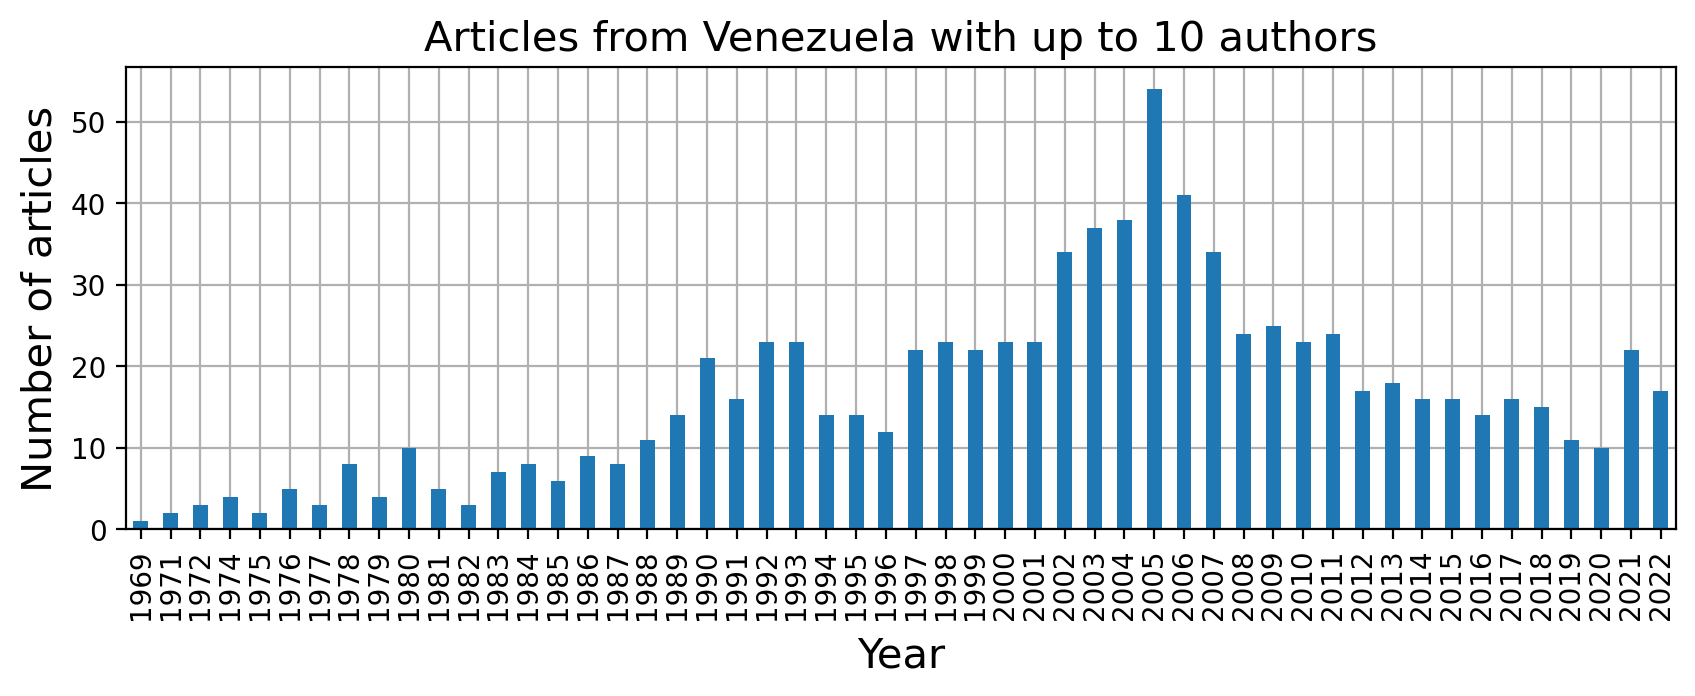

In [16]:
# Plot articles for all Latin America

for country in LA_countries:
    plot_articles_per_year(country)

In [17]:
# Get number of authors 

def get_number_authors(country):
    # import json
    db=pd.read_json('data/inspire_LA.json')
    # select country
    db=db[db['country']==country].reset_index(drop=True)
    # remove duplicate authors according to `author_id`
    db = db.drop_duplicates(subset=['author_id'])
    number_of_authors = len(db.index)
    print(f"{country}: {number_of_authors} authors.")
    
for country in LA_countries:
    get_number_authors(country)

Argentina: 773 authors.
Bolivia: 14 authors.
Brazil: 2782 authors.
Chile: 815 authors.
Colombia: 218 authors.
Costa Rica: 13 authors.
Cuba: 53 authors.
Ecuador: 28 authors.
Guatemala: 13 authors.
Honduras: 1 authors.
Mexico: 1253 authors.
Paraguay: 3 authors.
Peru: 44 authors.
Uruguay: 27 authors.
Venezuela: 103 authors.


In [18]:
# import json
db=pd.read_json('data/inspire_LA.json')
# select country
db=db[db['country']=='Chile'].reset_index(drop=True)
# remove duplicate authors according to `author_id`
db = db.drop_duplicates(subset=['author_id'])
number_of_authors = len(db.index)

In [19]:
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1305754,"{'value': 'Zamora, Renato Andres', 'preferred_...",910376,"[{'value': 'grid.412193.c', 'schema': 'GRID'},...",Chile,Diego Portales U.,"[{'value': 'rrzamora@uc.cl', 'current': True}]",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0002-2223-3361', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1779930, 'year':..."
2,1002209,"{'value': 'Kopeliovich, Boris Z.', 'preferred_...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'boris.kopeliovich@usm.cl', 'curren...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...","[{'value': 'B.Z.Kopeliovich.1', 'schema': 'INS...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
3,1024370,"{'value': 'Potashnikova, Irina K.', 'preferred...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'irina.potashnikova@usm.cl', 'curre...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'I.K.Potashnikova.1', 'schema': 'IN...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
4,989832,"{'value': 'Schmidt, Ivan A.', 'preferred_name'...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'ivan.schmidt@usm.cl', 'current': T...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0002-2586-4599', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
5,1050850,"{'value': 'Siddikov, Marat', 'preferred_name':...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'marat.siddikov@usm.cl', 'current':...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...","[{'value': '0000-0002-9290-3236', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."


In [20]:
def active_author(papers, curr_year=2022):
    """
    Determines if an author is active or not
    Parameters
    ----------
        papers : list
    Returns
    -------
        bool
    """
    years = []
    for paper in papers:
        years.append(paper.get('year'))
    years = list(map(int, years))
    max_year = max(years)
    return (curr_year - max_year) <= 5 

In [21]:
extra_col = db.papers.apply(lambda x: active_author(x)).sum()
print(extra_col)

461


In [23]:
# Get number of active authors 

def get_active_authors(country):
    # import json
    db=pd.read_json('data/inspire_LA.json')
    # select country
    db=db[db['country']==country].reset_index(drop=True)
    # remove duplicate authors according to `author_id`
    db = db.drop_duplicates(subset=['author_id'])
    n_authors = db.papers.apply(lambda x: active_author(x)).sum()
    print(f"{country}: {n_authors} authors.")
    
for country in LA_countries:
    get_active_authors(country)

Argentina: 406 authors.
Bolivia: 1 authors.
Brazil: 1843 authors.
Chile: 461 authors.
Colombia: 159 authors.
Costa Rica: 7 authors.
Cuba: 31 authors.
Ecuador: 21 authors.
Guatemala: 12 authors.
Honduras: 1 authors.
Mexico: 832 authors.
Paraguay: 2 authors.
Peru: 24 authors.
Uruguay: 23 authors.
Venezuela: 37 authors.


In [24]:
# Get number of papers  

def number_of_papers(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    print(f"{name_of_country} = {dp.shape[0]} papers.")
    pass
  
for country in LA_countries:
    number_of_papers(country)

Argentina = 4862 papers.
Bolivia = 33 papers.
Brazil = 21578 papers.
Chile = 4976 papers.
Colombia = 1037 papers.
Costa Rica = 205 papers.
Cuba = 414 papers.
Ecuador = 112 papers.
Guatemala = 16 papers.
Honduras = 1 papers.
Mexico = 8289 papers.
Paraguay = 3 papers.
Peru = 129 papers.
Uruguay = 301 papers.
Venezuela = 855 papers.


In [25]:
# Get number of citations  

def number_of_citations(name_of_country):
    """
    This is a function
    """
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==name_of_country].reset_index(drop=True)
    dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)
    citations = dp['citation_count'].sum()
    print(f"{name_of_country} = {citations} citations")
    pass

for country in LA_countries:
    number_of_citations(country)

Argentina = 101086 citations
Bolivia = 50 citations
Brazil = 345902 citations
Chile = 130995 citations
Colombia = 18118 citations
Costa Rica = 7876 citations
Cuba = 6406 citations
Ecuador = 1675 citations
Guatemala = 109 citations
Honduras = 0 citations
Mexico = 135046 citations
Paraguay = 43 citations
Peru = 1389 citations
Uruguay = 7919 citations
Venezuela = 25893 citations


# h-index for all countries

In [26]:
def hIndex(citations):
    """
    https://github.com/kamyu104/LeetCode/blob/master/Python/h-index.py
    :type citations: List[int]
    :rtype: int
    
    # Given an array of citations (each citation is a non-negative integer)
    # of a researcher, write a function to compute the researcher's h-index.
    #
    # According to the definition of h-index on Wikipedia: 
    # "A scientist has index h if h of his/her N papers have
    # at least h citations each, and the other N − h papers have
    # no more than h citations each."
    #
    # For example, given citations = [3, 0, 6, 1, 5], 
    # which means the researcher has 5 papers in total
    # and each of them had received 3, 0, 6, 1, 5 citations respectively. 
    # Since the researcher has 3 papers with at least 3 citations each and 
    # the remaining two with no more than 3 citations each, his h-index is 3.
    #
    # Note: If there are several possible values for h, the maximum one is taken as the h-index.
    """
    import builtins
    sum=builtins.sum
    return sum(x >= i + 1 for i, x in enumerate(sorted(  list(citations), reverse=True)))

In [27]:
db.head()

,author_id,name,institution_id,external_system_identifiers,country,institution,email_addresses,positions,ids,Fields of Study,papers
0,1305754,"{'value': 'Zamora, Renato Andres', 'preferred_...",910376,"[{'value': 'grid.412193.c', 'schema': 'GRID'},...",Chile,Diego Portales U.,"[{'value': 'rrzamora@uc.cl', 'current': True}]",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0002-2223-3361', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1779930, 'year':..."
2,1002209,"{'value': 'Kopeliovich, Boris Z.', 'preferred_...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'boris.kopeliovich@usm.cl', 'curren...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...","[{'value': 'B.Z.Kopeliovich.1', 'schema': 'INS...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
3,1024370,"{'value': 'Potashnikova, Irina K.', 'preferred...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'irina.potashnikova@usm.cl', 'curre...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': 'I.K.Potashnikova.1', 'schema': 'IN...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
4,989832,"{'value': 'Schmidt, Ivan A.', 'preferred_name'...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'ivan.schmidt@usm.cl', 'current': T...",[{'record': {'$ref': 'https://inspirehep.net/a...,"[{'value': '0000-0002-2586-4599', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."
5,1050850,"{'value': 'Siddikov, Marat', 'preferred_name':...",911929,"[{'value': 'INST-108804', 'schema': 'SPIRES'}]",Chile,"CCTVal, Valparaiso","[{'value': 'marat.siddikov@usm.cl', 'current':...","[{'rank': 'SENIOR', 'record': {'$ref': 'https:...","[{'value': '0000-0002-9290-3236', 'schema': 'O...",[],"[{'inst_id': 906126, 'recid': 1250510, 'year':..."


In [29]:
dp=pd.DataFrame( db.papers.apply(pd.Series).stack().to_list() ).drop_duplicates(subset='recid').reset_index(drop=True)

In [30]:
dp.head()

,inst_id,recid,year,citation_count,primary_arxiv_category
0,906126,1779930,2020,0,[]
1,906126,1250510,2013,0,[]
2,907275,852688,2010,35,[hep-ph]
3,907275,843643,2010,33,[hep-ph]
4,912250,893631,2011,17,[]


h5-Index

In [31]:
hIndex( dp[dp.year.apply(lambda y: eval(y) if y else 0
            ).apply(lambda y: y>time.localtime().tm_year-6 and
                               y<time.localtime().tm_year-1)
           ].citation_count)

49

In [32]:
def h_index_country(country):
    db=pd.read_json('data/inspire_LA.json')
    db=db[db['country']==country].reset_index(drop=True)
    dp=pd.DataFrame(db.papers.apply(pd.Series).stack().to_list()).drop_duplicates(subset='recid').reset_index(drop=True)
    ans = hIndex(dp.citation_count)
    return ans


In [33]:
for country in LA_countries:
    print(f"{country} h-index = {h_index_country(country)}")


Argentina h-index = 124
Bolivia h-index = 4
Brazil h-index = 172
Chile h-index = 135
Colombia h-index = 62
Costa Rica h-index = 43
Cuba h-index = 34
Ecuador h-index = 23
Guatemala h-index = 5
Honduras h-index = 0
Mexico h-index = 127
Paraguay h-index = 2
Peru h-index = 22
Uruguay h-index = 48
Venezuela h-index = 75


# Statistics per capita

In [34]:
import matplotlib.pyplot as plt
import numpy as np

"""
Arrays account for 
- Argentina
- Bolivia
- Brazil
- Chile
- Colombia
- Costa Rica
- Cuba
- Ecuador
- Guatemala
- Honduras
- Mexico
- Paraguay
- Peru
- Uruguay
- Venezuela
"""

populations = [45.606, 11.833, 213.993, 19.212, 51.266,
               5.139, 11.318, 17.888, 18.250, 10.063,
               130.262, 7.220, 33.359, 3.485, 28.705]

In [35]:
publications = [4862, 33, 21578, 4976, 1037, 
                205, 414, 112, 16, 1, 
                8289, 3, 129, 301, 855]

In [36]:
publications_pc = np.divide(publications, populations) 
print(publications_pc)

[1.06608780e+02 2.78881095e+00 1.00835074e+02 2.59004789e+02
 2.02278313e+01 3.98910294e+01 3.65789009e+01 6.26118068e+00
 8.76712329e-01 9.93739442e-02 6.36332929e+01 4.15512465e-01
 3.86702239e+00 8.63701578e+01 2.97857516e+01]


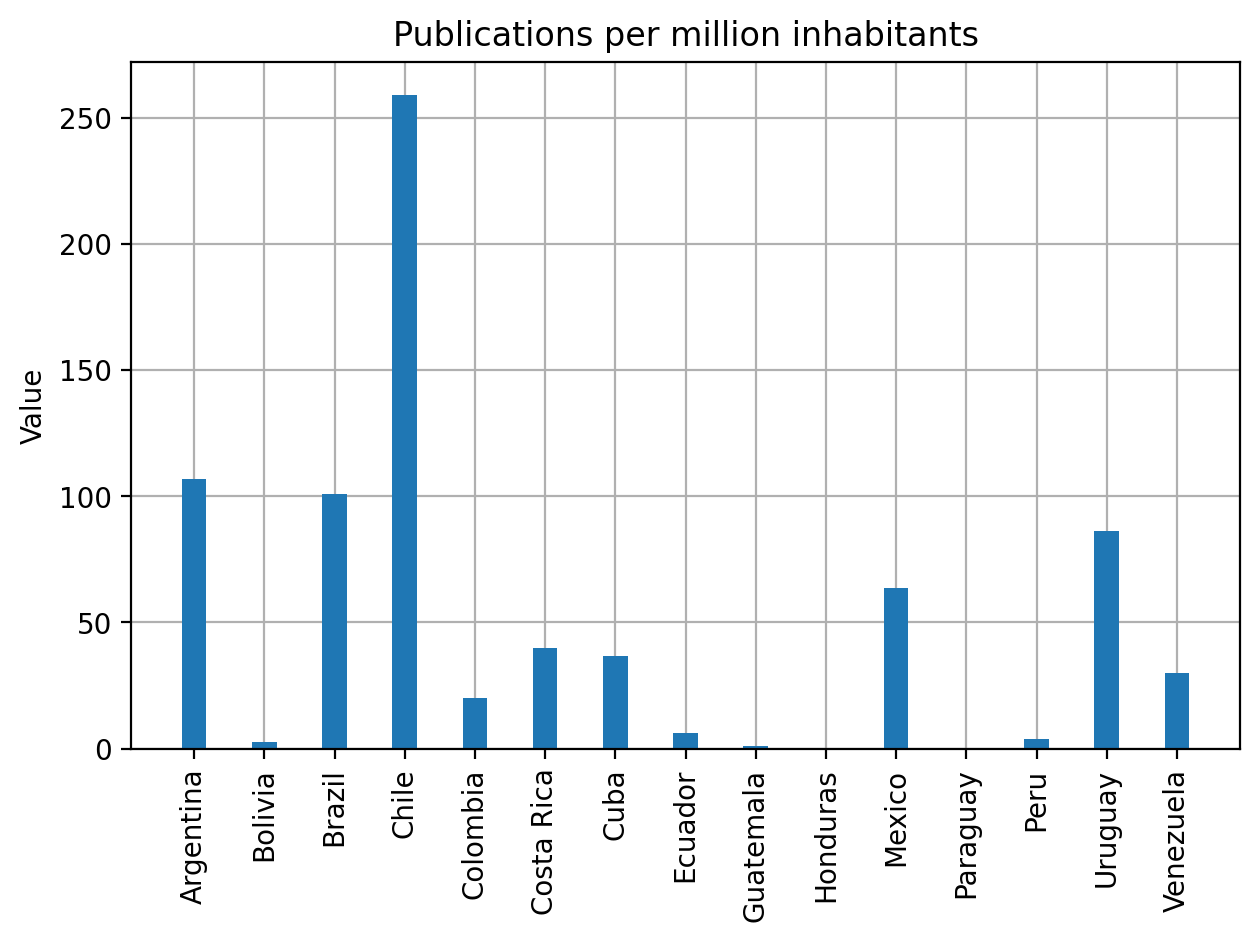

In [37]:
def gen_publs_pc():

    labels = LA_countries
    data = publications_pc

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('Publications per million inhabitants')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x, labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'plots_for_tables/publications_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_publs_pc()

In [38]:
authors = [773, 14, 2782, 815, 218, 
           13, 53, 28, 13, 1, 
           1253, 3, 44, 27, 103]

In [39]:
authors_pc = np.divide(authors, populations)
print(authors_pc)

[16.94952419  1.18313192 13.00042525 42.42140329  4.25233098  2.52967503
  4.68280615  1.56529517  0.71232877  0.09937394  9.6190754   0.41551247
  1.31898438  7.74748924  3.58822505]


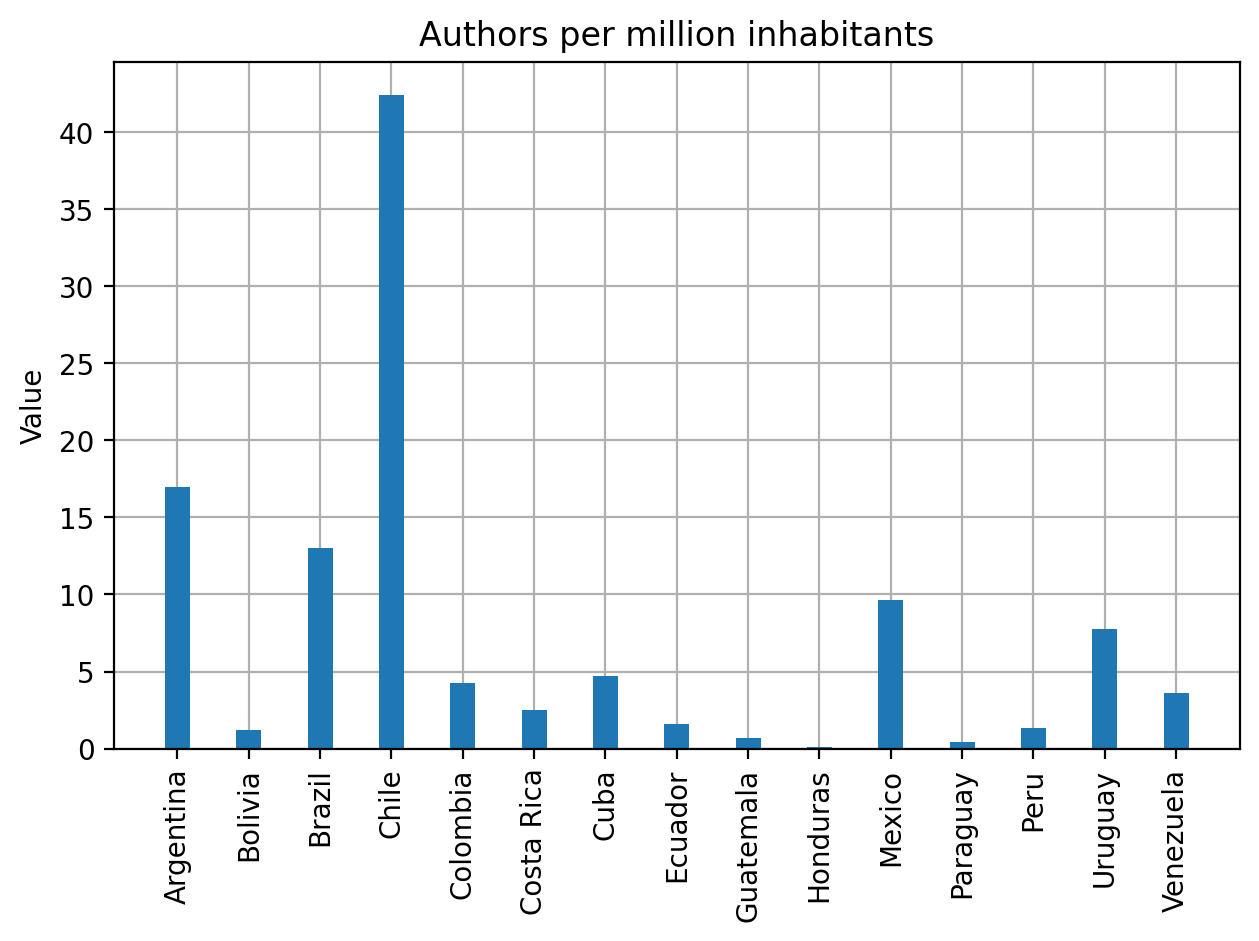

In [40]:
def gen_auths_pc():

    labels = LA_countries
    data = authors_pc

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('Authors per million inhabitants')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x, labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'plots_for_tables/authors_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_auths_pc()

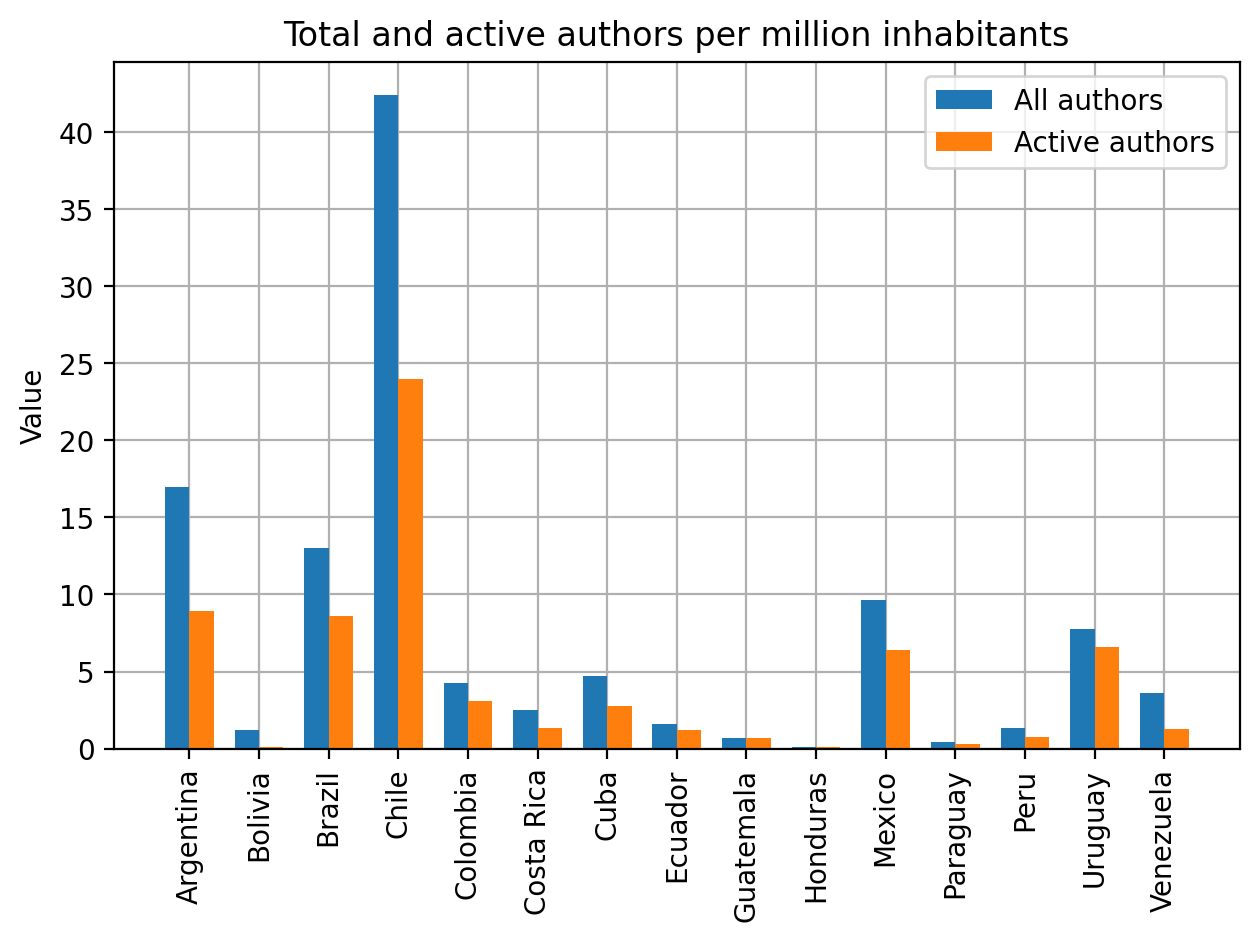

In [41]:
act_authors = [406, 1, 1843, 461, 159, 
               7, 31, 21, 12, 1, 
               832, 2, 24, 23, 37]

act_authors_pc = np.divide(act_authors, populations)
#print(act_authors_pc)

def gen_all_auths_pc():
    labels = LA_countries
    all_auths = authors_pc
    act_auths = act_authors_pc

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, all_auths, width, label='All authors')
    rects2 = ax.bar(x + width/2, act_auths, width, label='Active authors')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Value')
    ax.set_title('Total and active authors per million inhabitants')
    ax.set_xticks(x, labels, rotation=90)
    ax.legend()
    ax.grid()
    ax.set_axisbelow(True)


    fig.tight_layout()
    fig.savefig(f'plots_for_tables/all_authors_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()

    
gen_all_auths_pc()



In [42]:
citations = [101086, 50, 345092, 130995, 18118, 7876, 
             6406, 1675, 109, 0, 135046, 
             43, 1389, 7919, 25893]

In [43]:
citations_pc = np.divide(citations, populations)
print(citations_pc)

[2.21650660e+03 4.22547114e+00 1.61263219e+03 6.81839475e+03
 3.53411618e+02 1.53259389e+03 5.66001060e+02 9.36381932e+01
 5.97260274e+00 0.00000000e+00 1.03672598e+03 5.95567867e+00
 4.16379388e+01 2.27230990e+03 9.02037972e+02]


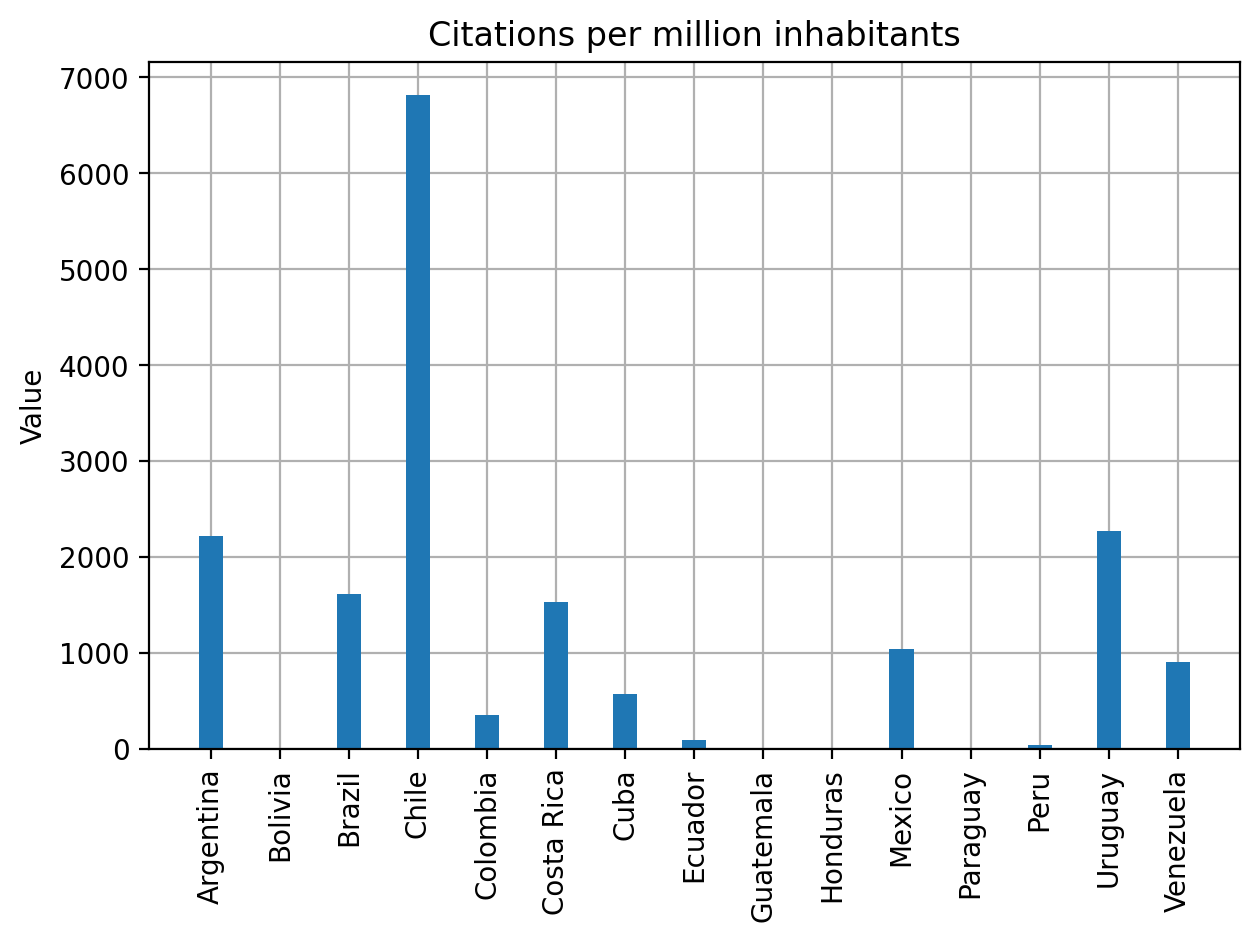

In [44]:
def gen_cits_pc():

    labels = LA_countries
    data = citations_pc

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('Citations per million inhabitants')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x, labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'plots_for_tables/citations_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_cits_pc()

In [45]:
h_index = [124, 4, 172, 135, 62, 43, 34, 23, 5, 0, 127, 2, 22, 48, 75]

In [46]:
h_index_pc = np.divide(h_index, populations)
print(h_index_pc)

[ 2.71894049  0.33803769  0.80376461  7.02685821  1.20937854  8.36738665
  3.00406432  1.28577818  0.2739726   0.          0.97495816  0.27700831
  0.65949219 13.7733142   2.61278523]


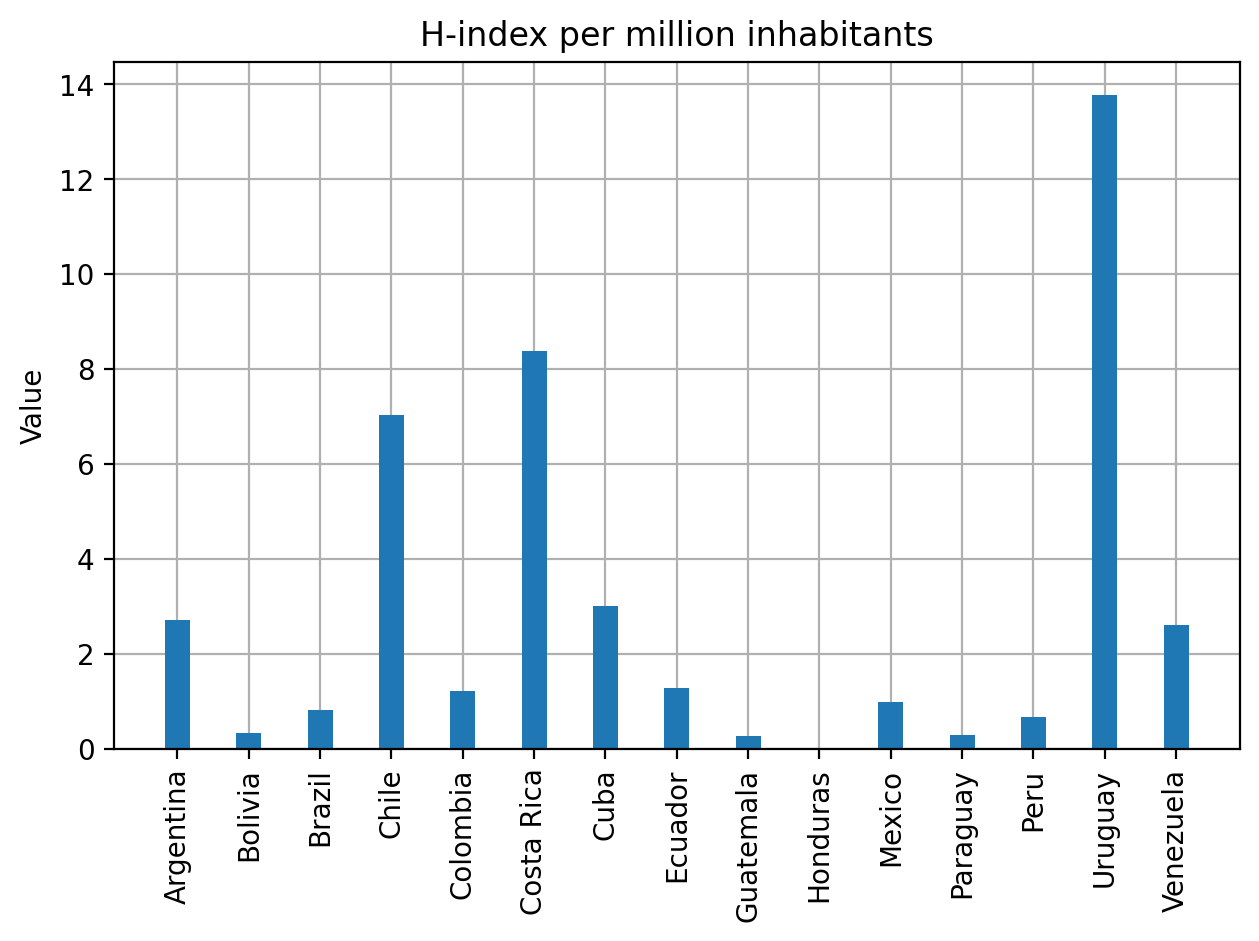

In [47]:
def gen_h_index_pc():

    labels = LA_countries
    data = h_index_pc

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars
    fig, ax = plt.subplots()
    ax.bar(x, data, width)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.grid(True)
    ax.set_ylabel('Value')
    ax.set_title('H-index per million inhabitants')
    ax.tick_params(axis='x', rotation=90)
    ax.set_xticks(x, labels)
    ax.set_axisbelow(True)

    fig.tight_layout()
    fig.savefig(f'plots_for_tables/h_index_pc.pdf', 
                dpi=150, bbox_inches = 'tight')

    plt.show()
    
gen_h_index_pc()

# Extra plots

In [48]:
gdp = [0.46,
       0.28,
       1.21,  
       0.34, 
       0.32,
       0.37, 
       0.55, 
       0.44, 
       0.03, 
       0.04, 
       0.28, 
       0.14, 
       0.16, 
       0.48, 
       0.34]


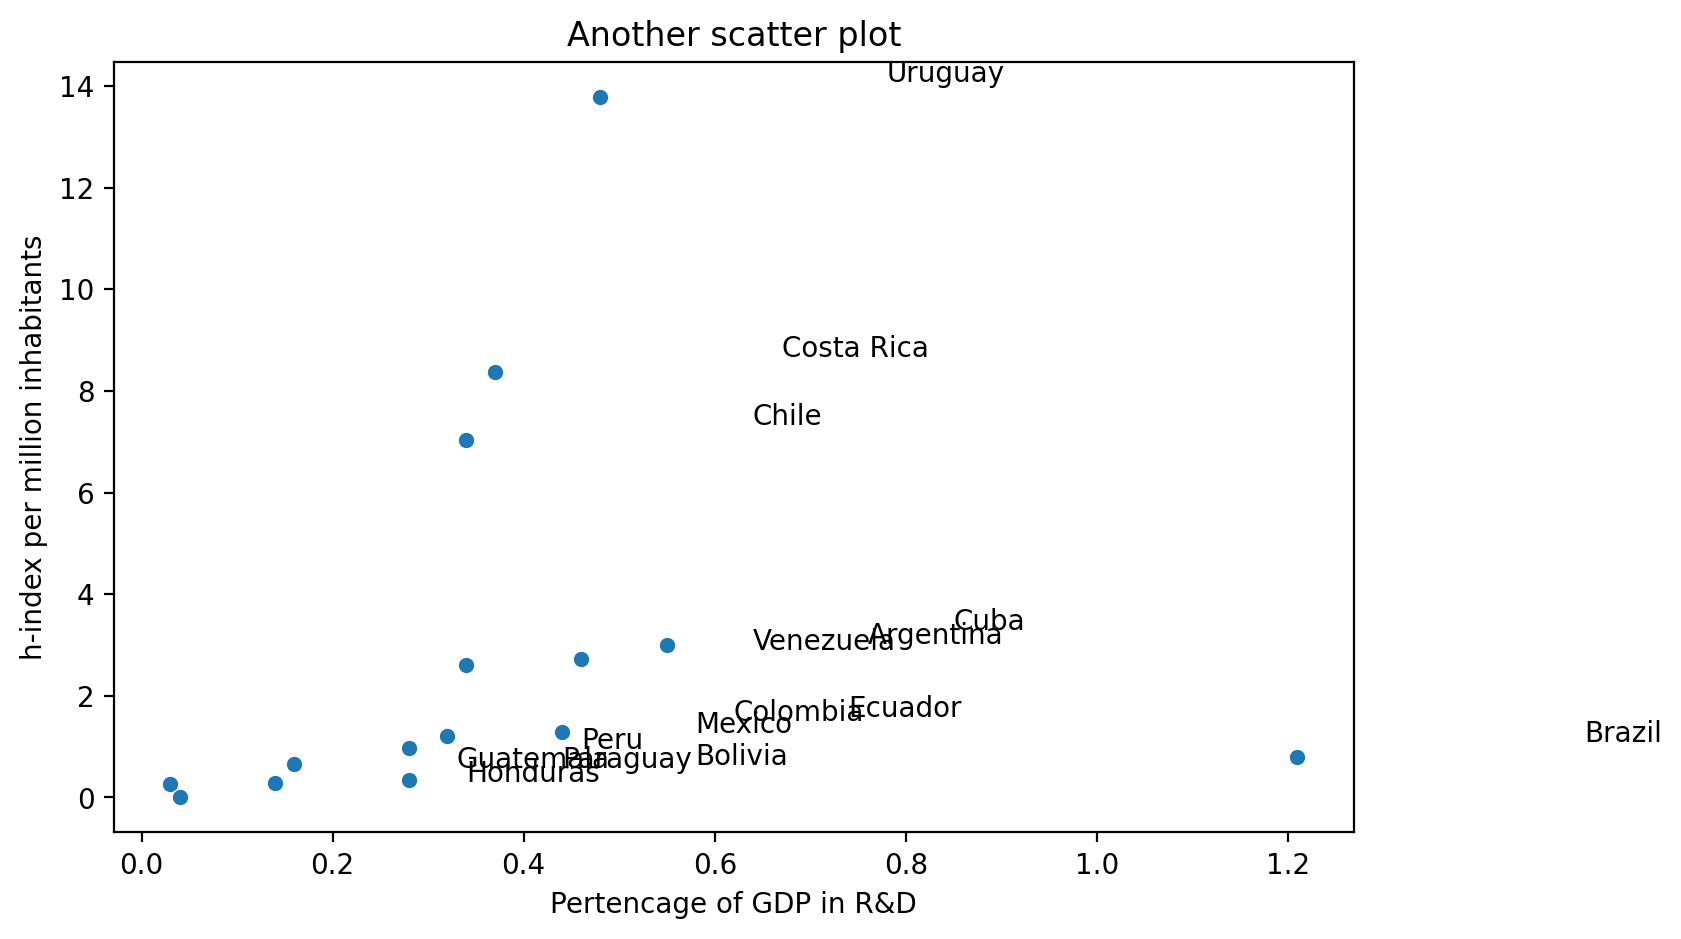

In [57]:
plt.figure(figsize=(8,5))

sns.scatterplot(x=gdp,y=h_index_pc)

for i in range(len(gdp)):
    plt.text(x=gdp[i]+0.3,y=h_index_pc[i]+0.3, s=LA_countries[i])

plt.title('Another scatter plot') #title
plt.xlabel('Pertencage of GDP in R&D') #x label
plt.ylabel('h-index per million inhabitants') #y label

plt.show()

In [58]:
colour_list = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']

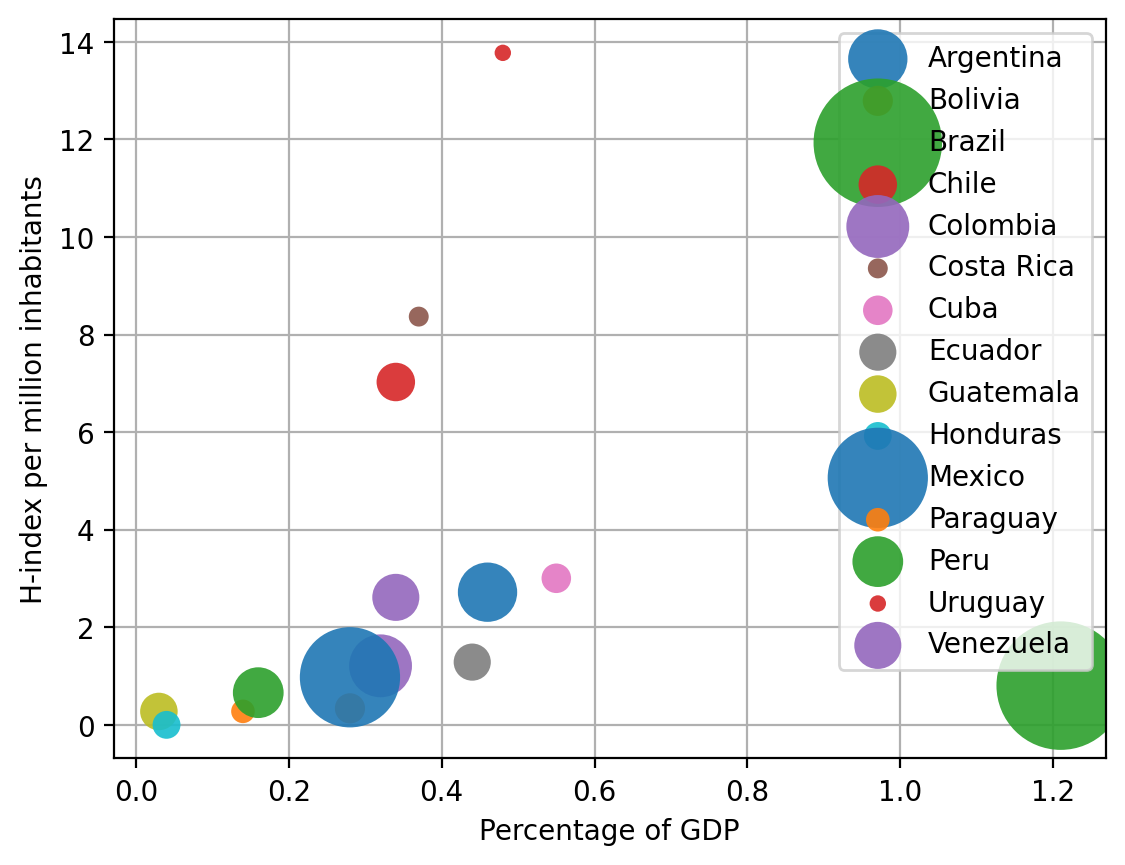

In [64]:
fig, ax = plt.subplots()

data = list(zip(LA_countries, gdp, h_index_pc, populations))

for datapoint in data:
    x = datapoint[1]
    y = datapoint[2]
    r = datapoint[3]  #radius
    ax.scatter(x, y, label=datapoint[0], s=10*r,
               alpha=0.9, edgecolors='none')
    #ax.annotate(datapoint[0], (x, y))
    
    # format
    ax.set_xlabel('Percentage of GDP')
    ax.set_ylabel('H-index per million inhabitants')

ax.grid(True)
ax.set_axisbelow(True)
ax.legend()
fig.savefig('hello.pdf')

# Mexico is left out with these limits
#ax.set_xlim([0, 0.6])

plt.show()

In [61]:
print(h_index_pc)

[ 2.71894049  0.33803769  0.80376461  7.02685821  1.20937854  8.36738665
  3.00406432  1.28577818  0.2739726   0.          0.97495816  0.27700831
  0.65949219 13.7733142   2.61278523]


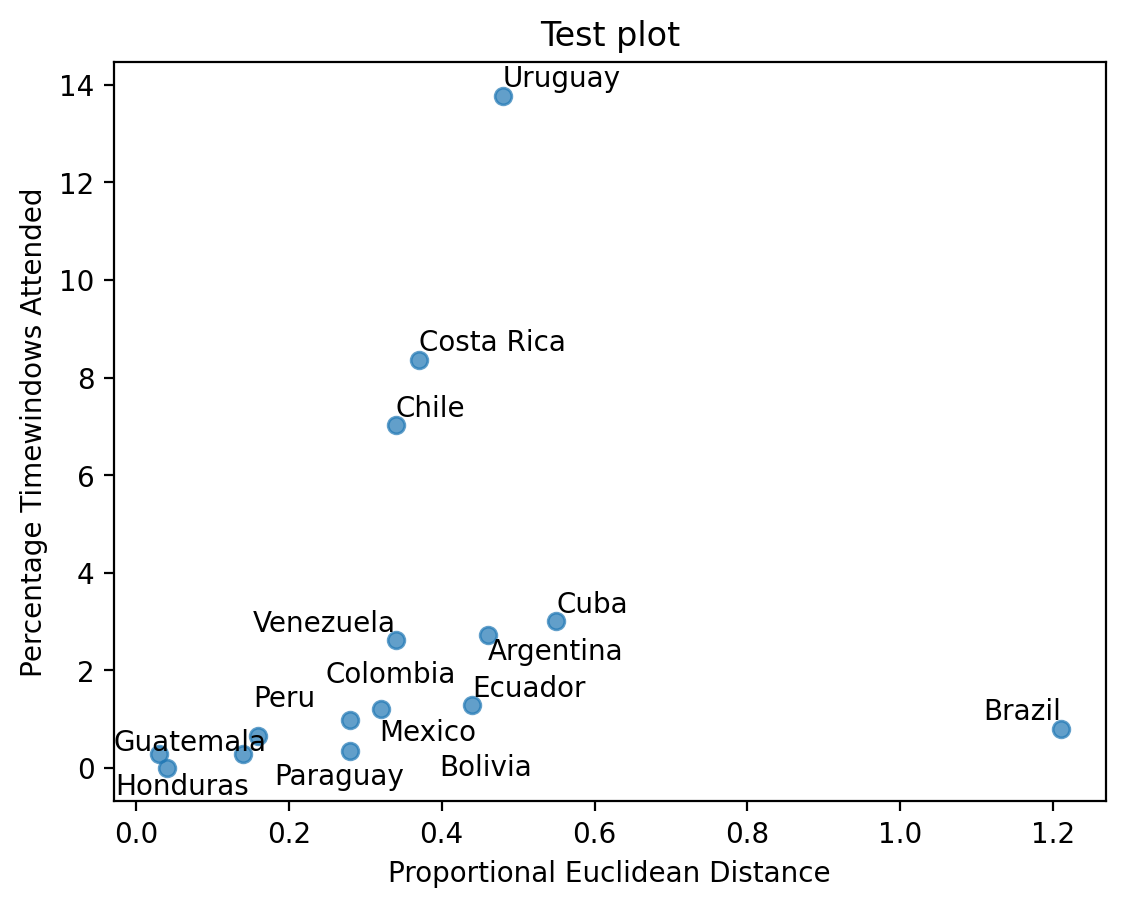

In [62]:
from adjustText import adjust_text

text = LA_countries
eucs = gdp
covers = h_index_pc

plt.scatter(eucs, covers, alpha=0.7)
texts = []
for x, y, s in zip(eucs, covers, text):
    texts.append(plt.text(x, y, s))

plt.xlabel("Proportional Euclidean Distance")
plt.ylabel("Percentage Timewindows Attended")
plt.title("Test plot")
adjust_text(texts, only_move={'points':'y', 'texts':'y'})
plt.show()